# Importing datasets:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing train dataset
df = pd.read_csv("train.csv") #Reading csv file
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

Above is my train dataset on which i have to build a predictive model. And I have to use the saved best model to predict sales price in test dataset. So clearly SalesPrice is my target and since data type of SalesPrice column is integer it is a **Regression Problem.**

In [4]:
#importing test dataset
dff = pd.read_csv("test.csv") #Reading csv file
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Above is my test dataset. I can merge bith train and test datasets. But i'm not doing that because of data leakage problem. Let me separately clean both train and test datasets.
Firstly let me clean train dataset followed by test dataset.

# Exploratory Data Analysis:

In [5]:
#Checking shape of my train dataset
df.shape

(1168, 81)

In my tarin dataset i have 1168 rows and 81 columns.

In [6]:
#Checking shape of my test dataset
dff.shape

(292, 80)

In my test dataset i have 292 rows and 80 columns.

In [7]:
#Checking all column names of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the train dataset.

In [8]:
#Checking all column names of train dataset
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the test dataset.

In [9]:
#Checking the data types of all columns in train dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In my train dataset i have int, object as well as flaot data types.

In [10]:
#Checking the data types of all columns in test dataset
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In my test dataset i have int, object as well as flaot data types.

In [11]:
#Checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- Above is the info about train dataset and i can see some missing values in the dataset. I have to take care of those missing values.
- And in Alley, PoolQC, Fence and  MiscFeature has more than 80% null values so i decided to drop this columns.

In [12]:
#Dropping unnecessary columns in train dataset
df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)

In [13]:
#Checking the info about the test dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- Above is the info about test dataset and i can see some missing values in the dataset. I have to take care of those missing values.
- And in Alley, PoolQC, Fence and MiscFeature has more than 80% null values so i decided to drop this columns.

In [14]:
#Dropping unnecessary columns in test dataset
dff = dff.drop(["Alley"],axis=1)
dff = dff.drop(["PoolQC"],axis=1)
dff = dff.drop(["Fence"],axis=1)
dff = dff.drop(["MiscFeature"],axis=1)

In [15]:
#Checking unique values of each column in train dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

- In Id column the unique count is 1168 which means all the values in the column are unique and ID is the identity number given for perticular asset so this ID has nothing to do with model training so i can drop this column.
- In Utilities column unique value count is 1 which means all the entries are same this will not help us in model building so let me drop this column.

In [16]:
#Droping unnecessary columns in train dataset
df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)

In [17]:
#Checking unique values of each column in test dataset
dff.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

- In Id column the unique count is 292 which means all the values in the column are unique and ID is the identitity number given for perticular asset so this ID has nothing to do with model training so i can drop this column.
- Since i have droped Utilities in train i have to drop here also.

In [18]:
#Droping unnecessary columns in test dataset
dff = dff.drop(["Id"],axis=1)
dff = dff.drop(["Utilities"],axis=1)

In [19]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
72.0      13
51.0      13
55.0      13
100.0     12
82.0      12
59.0      12
63.0      11
74.0      11
71.0      11
53.0      10
66.0      10
69.0      10
88.0      10
34.0       9
67.0       9
84.0       9
52.0       8
40.0       8
43.0       8
76.0       8
92.0       8
77.0       8
62.0       7
57.0       7
61.0       7
86.0       7
35.0       7
95.0       7
44.0       6
81.0       6
94.0       6
41.0       6
54.0   

I did not found any unnecessary or duplicate entries in any column in train dataset.

But i can see more than 85% zero values in 
- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

 So i have to drop these columns. In some other columns also there are zero values below 60% they are acceptable and also reasonable.

In [20]:
#Dropping unnecessary columns in train dataset
df.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [21]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in test dataset.
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64
****************************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
****************************************
60.0     32
85.0     14
50.0     13
70.0     12
80.0      9
21.0      9
65.0      9
75.0      7
52.0      6
78.0      6
63.0      6
66.0      5
64.0      5
57.0      5
74.0      4
55.0      4
43.0      4
40.0      4
72.0      4
100.0     4
67.0      3
76.0      3
24.0      3
79.0      3
90.0      3
44.0      3
110.0     3
68.0      3
86.0      3
102.0     3
93.0      3
48.0      3
96.0      2
35.0      2
107.0     2
32.0      2
42.0      2
37.0      2
62.0      2
51.0      2
56.0      2
58.0      2
92.0      2
47.0      2
73.0      2
83.0      2
91.0      2
98.0      2
120.0     1
45.0      1
33.0      1
137.0     1
150.0    

I did not found any unnecessary or duplicate entries in any column in test dataset.

But i can see more than 85% zero values in 
- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

 So i have to drop these columns. In some other columns also there are zero values below 60% they are acceptable and also reasonable.

In [22]:
#Dropping unnecessary columns in test dataset
dff.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

Successfully replaced all unnecessary entries.

In [23]:
#Checking null values in the train dataset
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

There are null values in most of the columns in train dataset i have impute them with there respective values.

In [24]:
#Checking null values in the test dataset
dff.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

There are null values in most of the columns in test dataset i have impute them with there respective values.

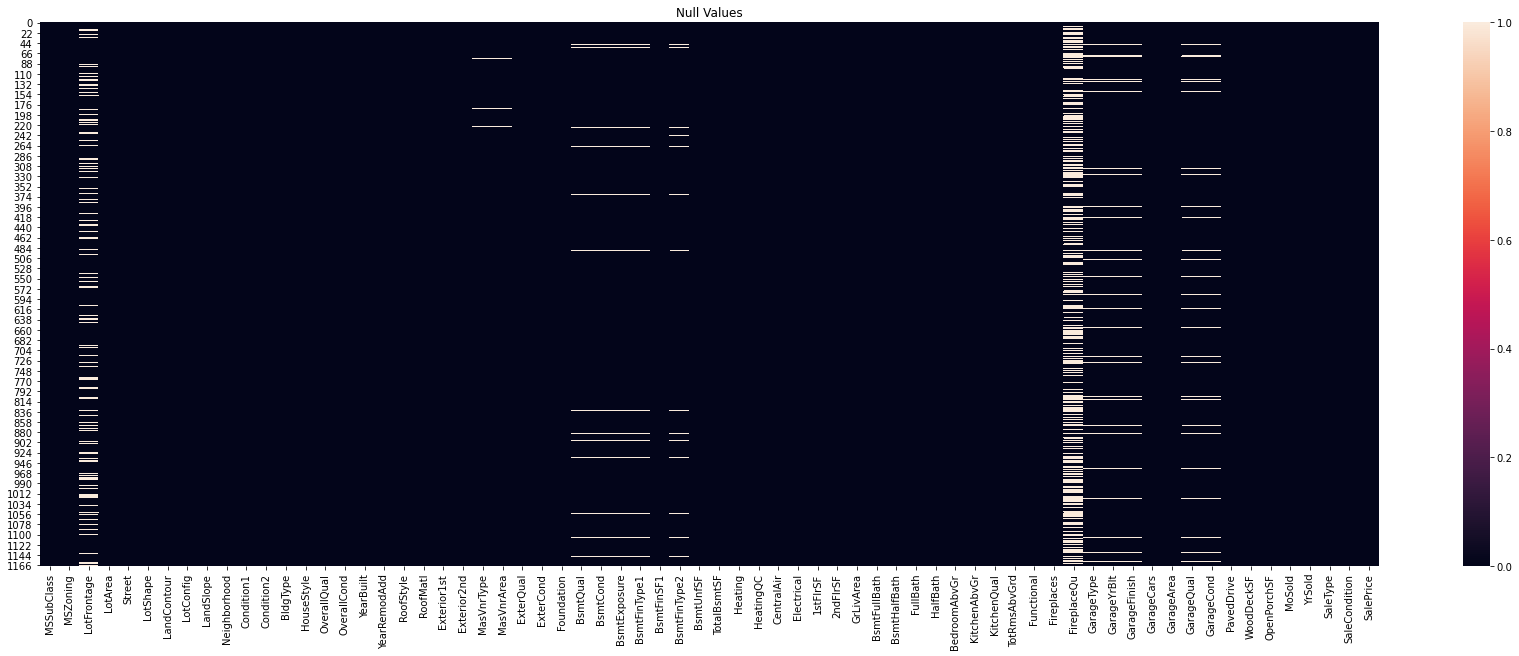

In [25]:
#Visualizeing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

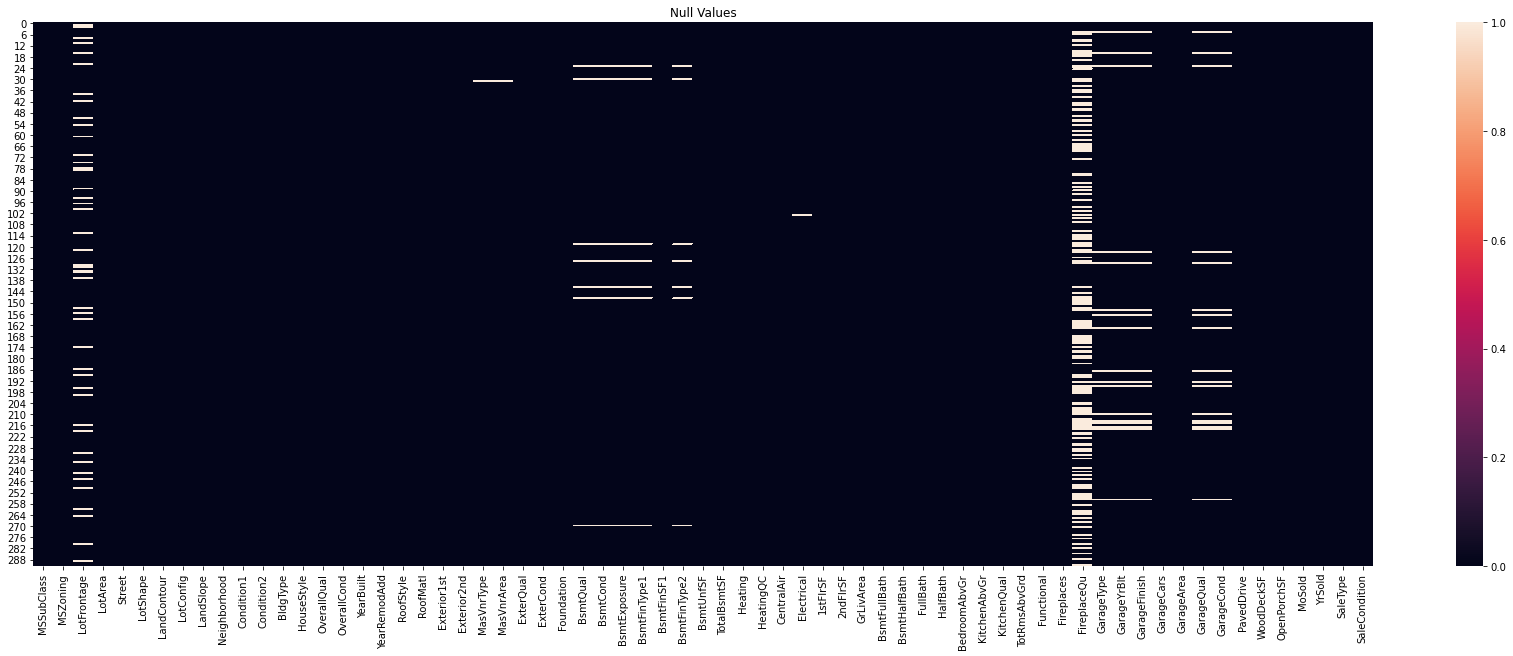

In [26]:
#Visualizeing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

I can see the null values now clearly both in train and test datasets.

# Imputation technique to replace nan values:

In [27]:
#Creating a list of categorical and numerical datatypes in train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [28]:
#Creating a list of categorical and numerical datatypes in test dataset
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col)

In [29]:
#Replacing null values of categorical column with mode of that column in train dataset.
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)

In [30]:
#Replacing null values of categorical column with mode of that column in test dataset.
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

Replaced all null values in categorical columns in both train and test datasets.

In [31]:
#Replacing null values of numerical column with mean of that column in train dataset.
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

In [32]:
#Replacing null values of numerical column with mean of that column in test dataset.
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

Replaced all null values in Numerical columns in both train and test datasets.

In [33]:
#Checking null values again in train dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

In [34]:
#Checking null values again in test dataset
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

Successfully i have replaced all null values in both train and test datasets.

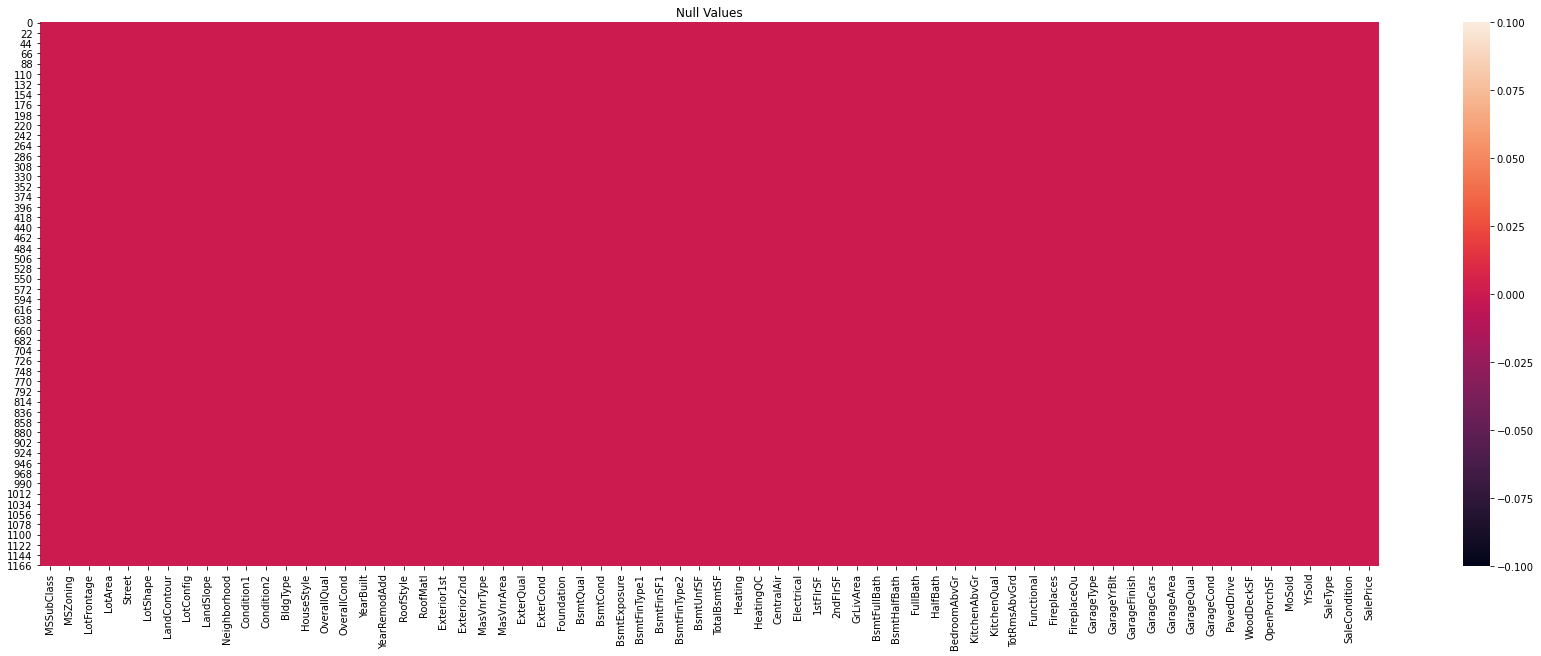

In [35]:
#Visualizeing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

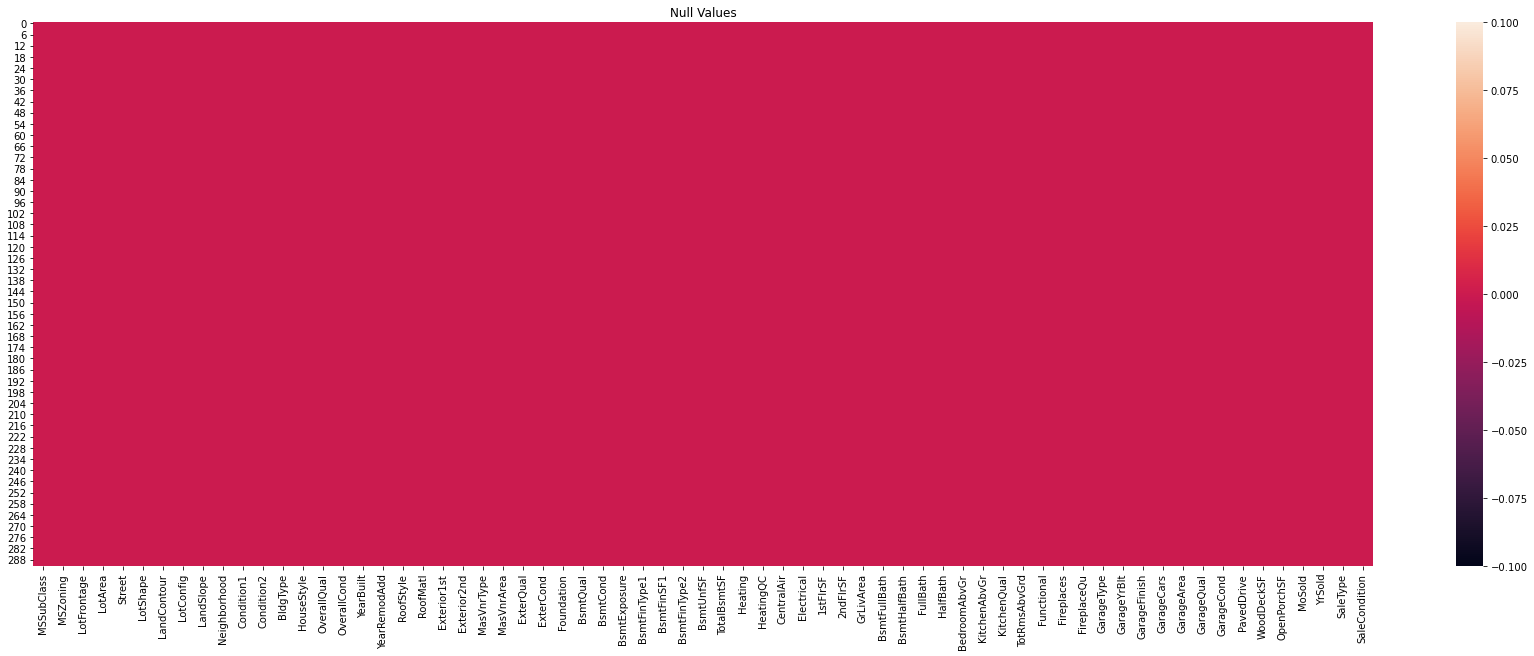

In [36]:
#Visualizeing null values again after imputation in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

Now successfully i have replaced all null values in both train and test datasets.

In [37]:
#Checking for empty observations in target column
df.loc[df['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

There is no empty observations in my target column.

# Feature Extraction:

In [38]:
# Converting years column to age column in train dataset
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [39]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [40]:
# Converting years column to age column in test dataset
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [41]:
# Dropping old columns in test dataset
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

I have converted all the year columns to there respective age, thinking that age will help us more than year in both train and test datasets.

In [42]:
#Checking description of data set in train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.0000

In [43]:
#Checking description of data set in test dataset
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

       Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold   GarageAge  
count       292.000000            292.000000      292.000000  292.000000  
mean         36.383562             24.705479        2.140411   30.240000  
std          30.447016             20.105792        1.322867   23.161183  
min           0.000000              0.000000        0.000000    0.000000  
25%           8.000000              6.750000        1.000000    8.000000  
50%          33.000000             16.000000        2.000000   30.240000  
75%          55.000000             42.000000        3.000000   45.000000  
max         137.000000             60.000000        4.000000   94.000000

Above is the statistics about the train and test datasets.The mean and the 2nd quantile values are not same in some columns so there is extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [44]:
# checking for categorical columns in train dataset
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the list of categorical columns in the train data set.

In [45]:
# checking for categorical columns in test dataset
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the list of categorical columns in the test data set.

In [46]:
# Now checking for numerical columns in train dataset
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

In [47]:
# Now checking for numerical columns in test dataset
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

# Univariate analysis for numerical columns:

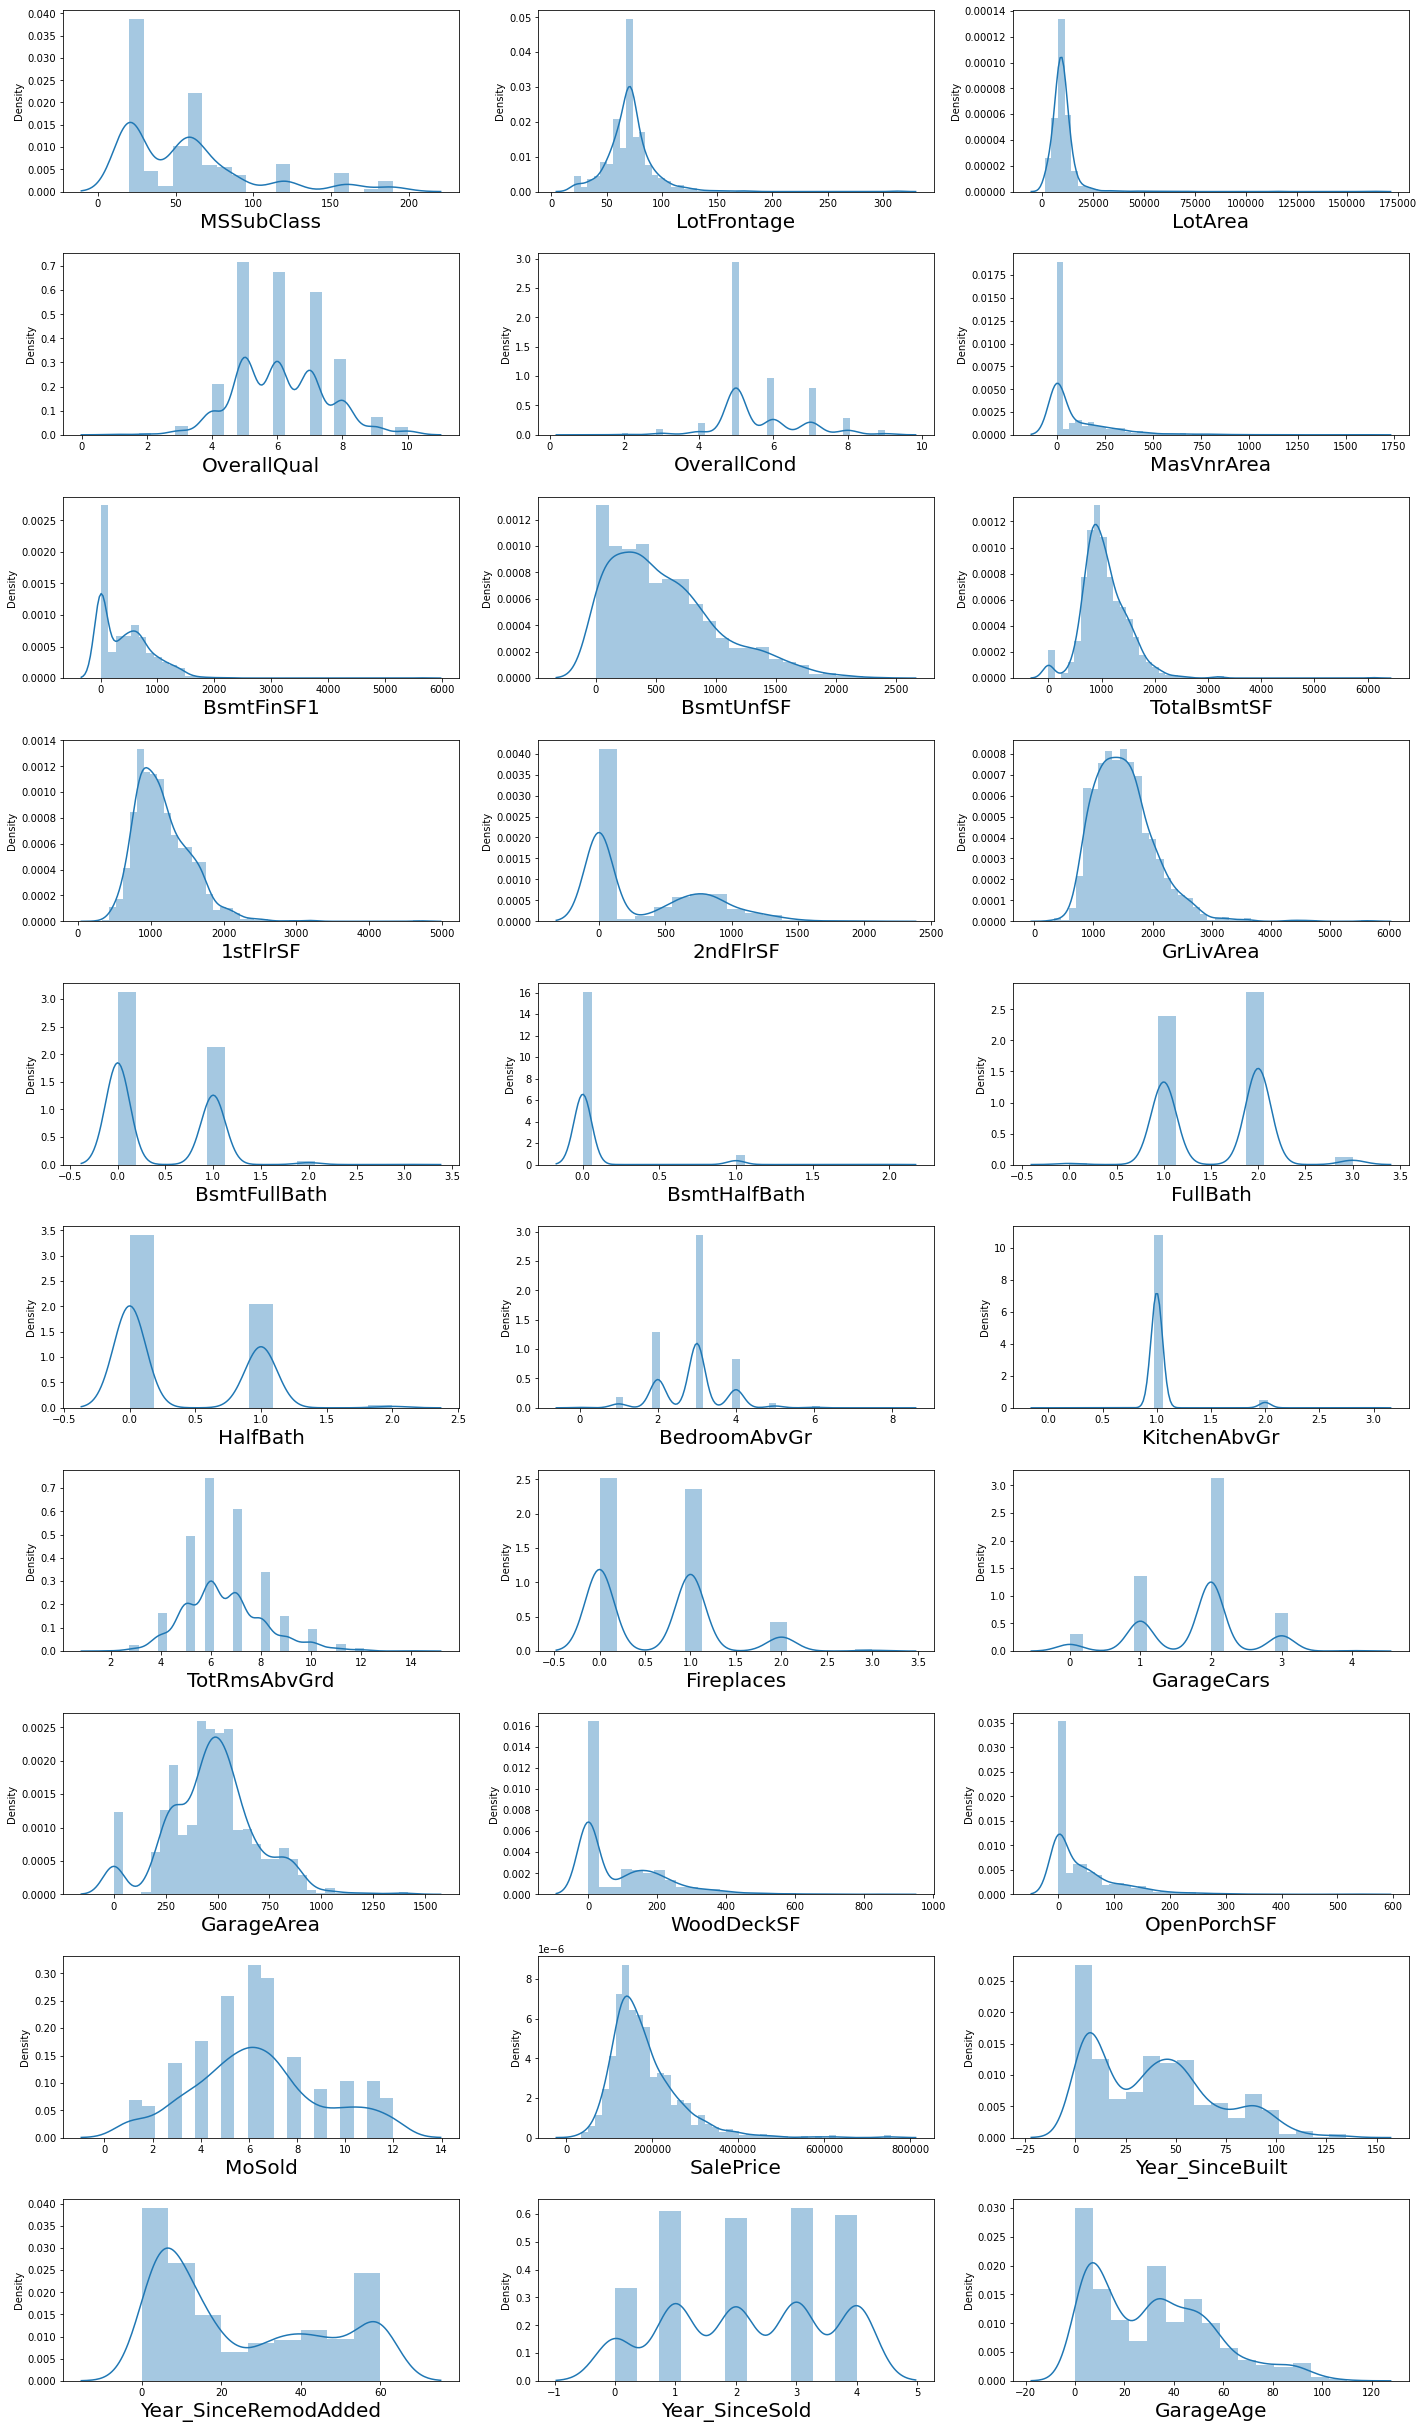

In [48]:
#Distribution plot for all numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.I have to remove this skewness. 

# Univariate analysis for categorical columns:

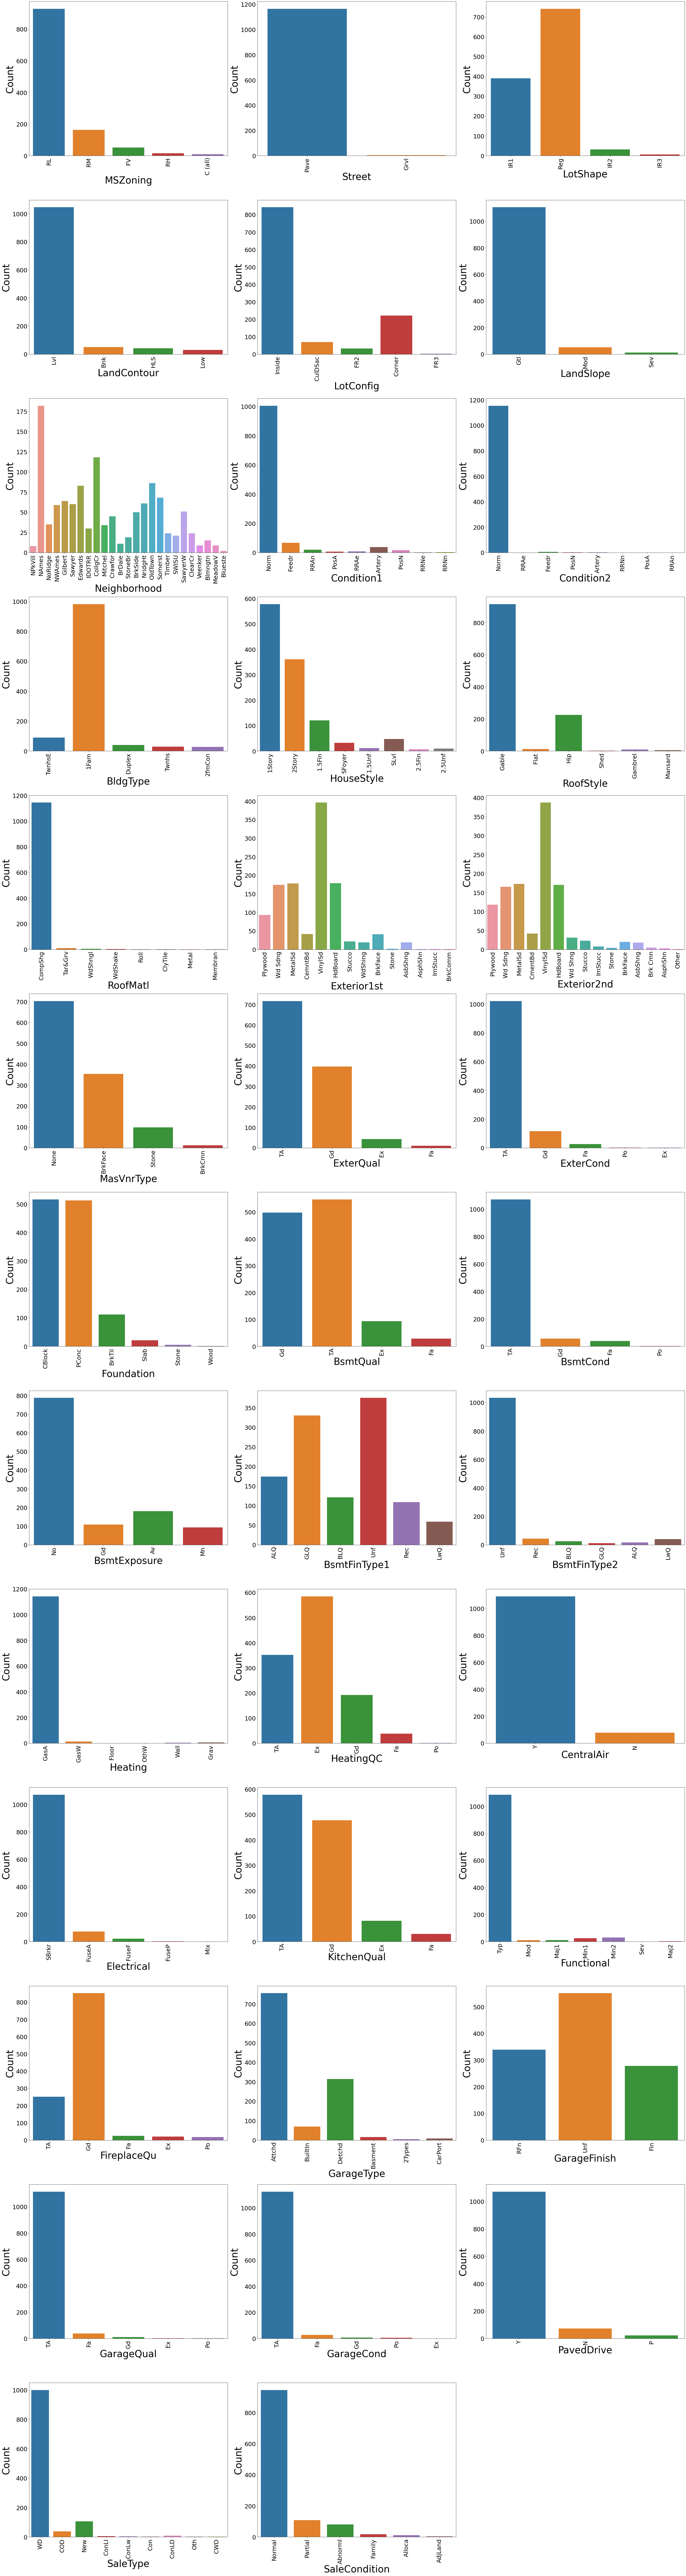

In [49]:
#Bar plot for all categorical columns
plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

**Observations:**
- 1. It is found that Residential Low Density zoning has maximum count, for the feature general zoning classification of the sale(MSZoning).
- 2. In Paved streets we can observe maximum count, for the feature Type of road access to property(Street).
- 3. Regular shaped property has maximum count, for the feature General shape of property(LotShape).
- 4. Near Flat/Level property has maximum count, for the feature Flatness of the property(LandContour).
- 5. Inside lot configured property has maximum count, for the feature Lot configuration(LotConfig).
- 6. Gentle sloped property has maximum count, for the feature Slope of property(LandSlope).
- 7.  If the property is located in North Ames then count is good compared to other locations, for the feature Physical locations within Ames city limits(Neighborhood).
- 8. If the Proximity to various conditions-1 is normal then count is high for the feature Proximity to various conditions(Condition1).
- 9. If the Proximity to various conditions-2 is normal then count is high for the feature Proximity to various conditions (if more than one is present)(Condition2).
- 10. Single-family Detached dwelling has maximum count for the feature Type of dwelling(BldgType).
- 11. One story dwelling housestyle has maximum count for the feature Style of dwelling(HouseStyle).
- 12. For Gable roof style the count is high for the feature Type of roof(RoofStyle).
- 13. For Standard (Composite) Shingle roof material the count is high for the feature Roof material(RoofMatl).
- 14. For Vinyl Siding exterior-1 covering on house has maximum counts for the feature Exterior covering on house(Exterior1st).
- 15. For Vinyl Siding exterior-2 covering on house has maximum counts for the feature Exterior covering on house (if more than one material)(Exterior2nd).
- 16. For Masonry veneer type(MasVnrType) None has maximum count.
- 17.For Typical/Average(TA) quality of the material on the exterior has maximum count, for the feature Evaluates the quality of the material on the exterior (ExterQual).
- 18. For Typical/Average(TA) condition of the material on the exterior has maximum count for the feature Evaluates the present condition of the material on the exterior(ExterCond).
- 19. For Cinder Block and Poured Contrete foundations the count is maximum for the feature Type of foundation(Foundation).
- 20. For good and average quality heights of the basement the count is high for the feature Evaluates the height of the basement(BsmtQual).
- 21. For Typical/Average(TA) general condition of the basement the count is high for the feature Evaluates the general condition of the basement(BsmtCond)
- 22. For No Exposure garden level walls the count is maximum for the feature Refers to walkout or garden level walls(BsmtExposure).
- 23. For unfinished Rating of basement finished area-1 the count is maximum for the feature Rating of basement finished area(BsmtFinType1).
- 24. For unfinished Rating of basement finished area-2 the count is maximum for the feature Rating of basement finished area (if multiple types)(BsmtFinType2).
- 25. For Gas forced warm air furnace type of heating the count is maximum for the feature Type of heating(Heating).
- 26. For Excellent Heating quality and condition the count is high for the feature Heating quality and condition(HeatingQC).
- 27. For Central air conditioning-yes has maximum count for the feature Central air conditioning(CentralAir).
- 28. For Standard Circuit Breakers & Romex Electrical system the count is high for the feature Electrical system(Electrical).
- 29. For Typical/Average(TA) and good Kitchen quality the count is maximum for the feature Kitchen quality(KitchenQual).
- 30. Typical Functionality has highest count for Home functionality (Assume typical unless deductions are warranted)(Functional).
- 31. For good Fireplace quality the count is high for the feature Fireplace quality(FireplaceQu).
- 32. If Garage location Attached to home then the count is high, for the feature Garage location(GarageType).
- 33. For Unfinished Interior of the garage the count is maximum, for the feature Interior finish of the garage(GarageFinish).
- 34. For Typical/Average(TA) Garage quality the count is high, for the feature Garage quality(GarageQual).
- 35. For Typical/Average(TA) Garage condition the count is high, for the feature Garage condition(GarageCond).
- 36. For Paved driveway the count is maximum, for the feature Paved driveway(PavedDrive).
- 37. For Warranty Deed - Conventional type of sales the count is maximum, for the feature Type of sale(SaleType).
- 38. For Normal sales condition the count is high, for the feature Condition of sale(SaleCondition).

# Bivariate Analysis:

# Bivariate Analysis for numerical columns:

In [50]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded','GarageAge']

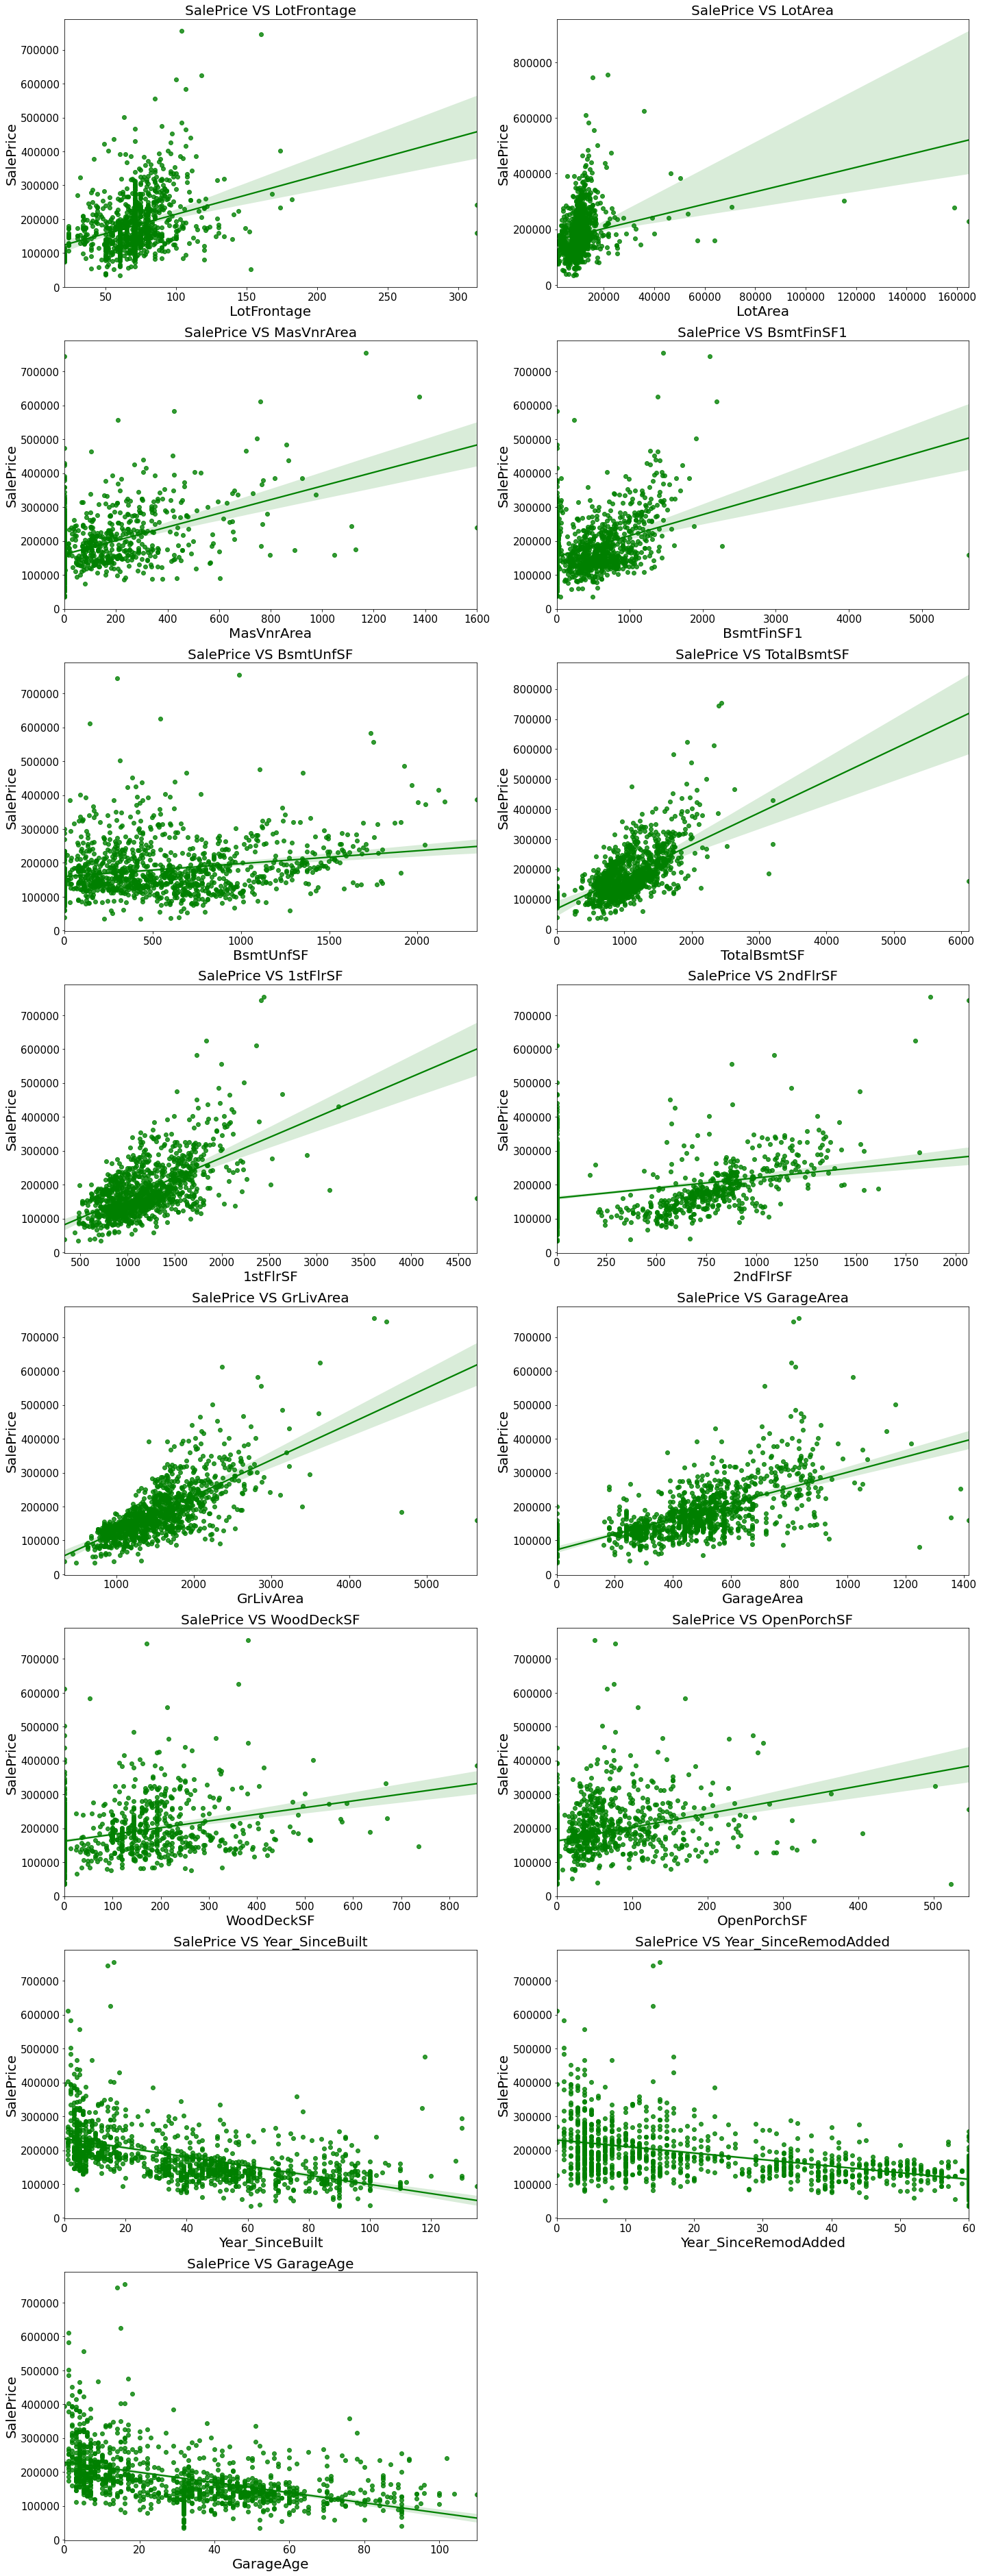

In [51]:
#regplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="g")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

**Observations:**
- 1.As Linear feet of street connected to property(LotFrontage) is increseing sales is decreasing and the SalePrice is rangeing between 0-3 lakhs.
- 2.As Lot size in square feet(LotArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 3.As Masonry veneer area in square feet(MasVnrArea) is increasing sales is decreasing and saleprice is rangeing between 0-4 lakhs.
- 4.As Type 1 finished square feet(BsmtFinSF1) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 5.As Unfinished square feet of basement area(BsmtUnfSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs. There are some outliers also.
- 6.As Total square feet of basement area(TotalBsmtSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 7.As First Floor square feet(1stFlrSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 8.As Second floor square feet(2ndFlrSF) is increseing sales is increasing in the range 500-1000 and the saleprice is in between 0-4 lakhs.
- 9.As Above grade (ground) living area square feet(GrLivArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 10.As Size of garage in square feet(GarageArea) is increseing sales is increseing and the saleprice is in between 0-4 lakhs.
- 11.As Wood deck area in square feet(WoodDeckSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 12.As Open porch area in square feet(OpenPorchSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 13.As Year_SinceBuilt is increseing sales is decreasing and the saleprice is high for newly built building and the sales price is in between 0-4 lakhs.
- 14.As Since Remodel date (same as construction date if no remodeling or additions)(Year_SinceRemodAdded) is increseing sales is decreasing and the saleprice is in between 1-4 lakhs.
- 15.As Since Year garage was built(GarageAge) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

In [52]:
col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Year_SinceSold']

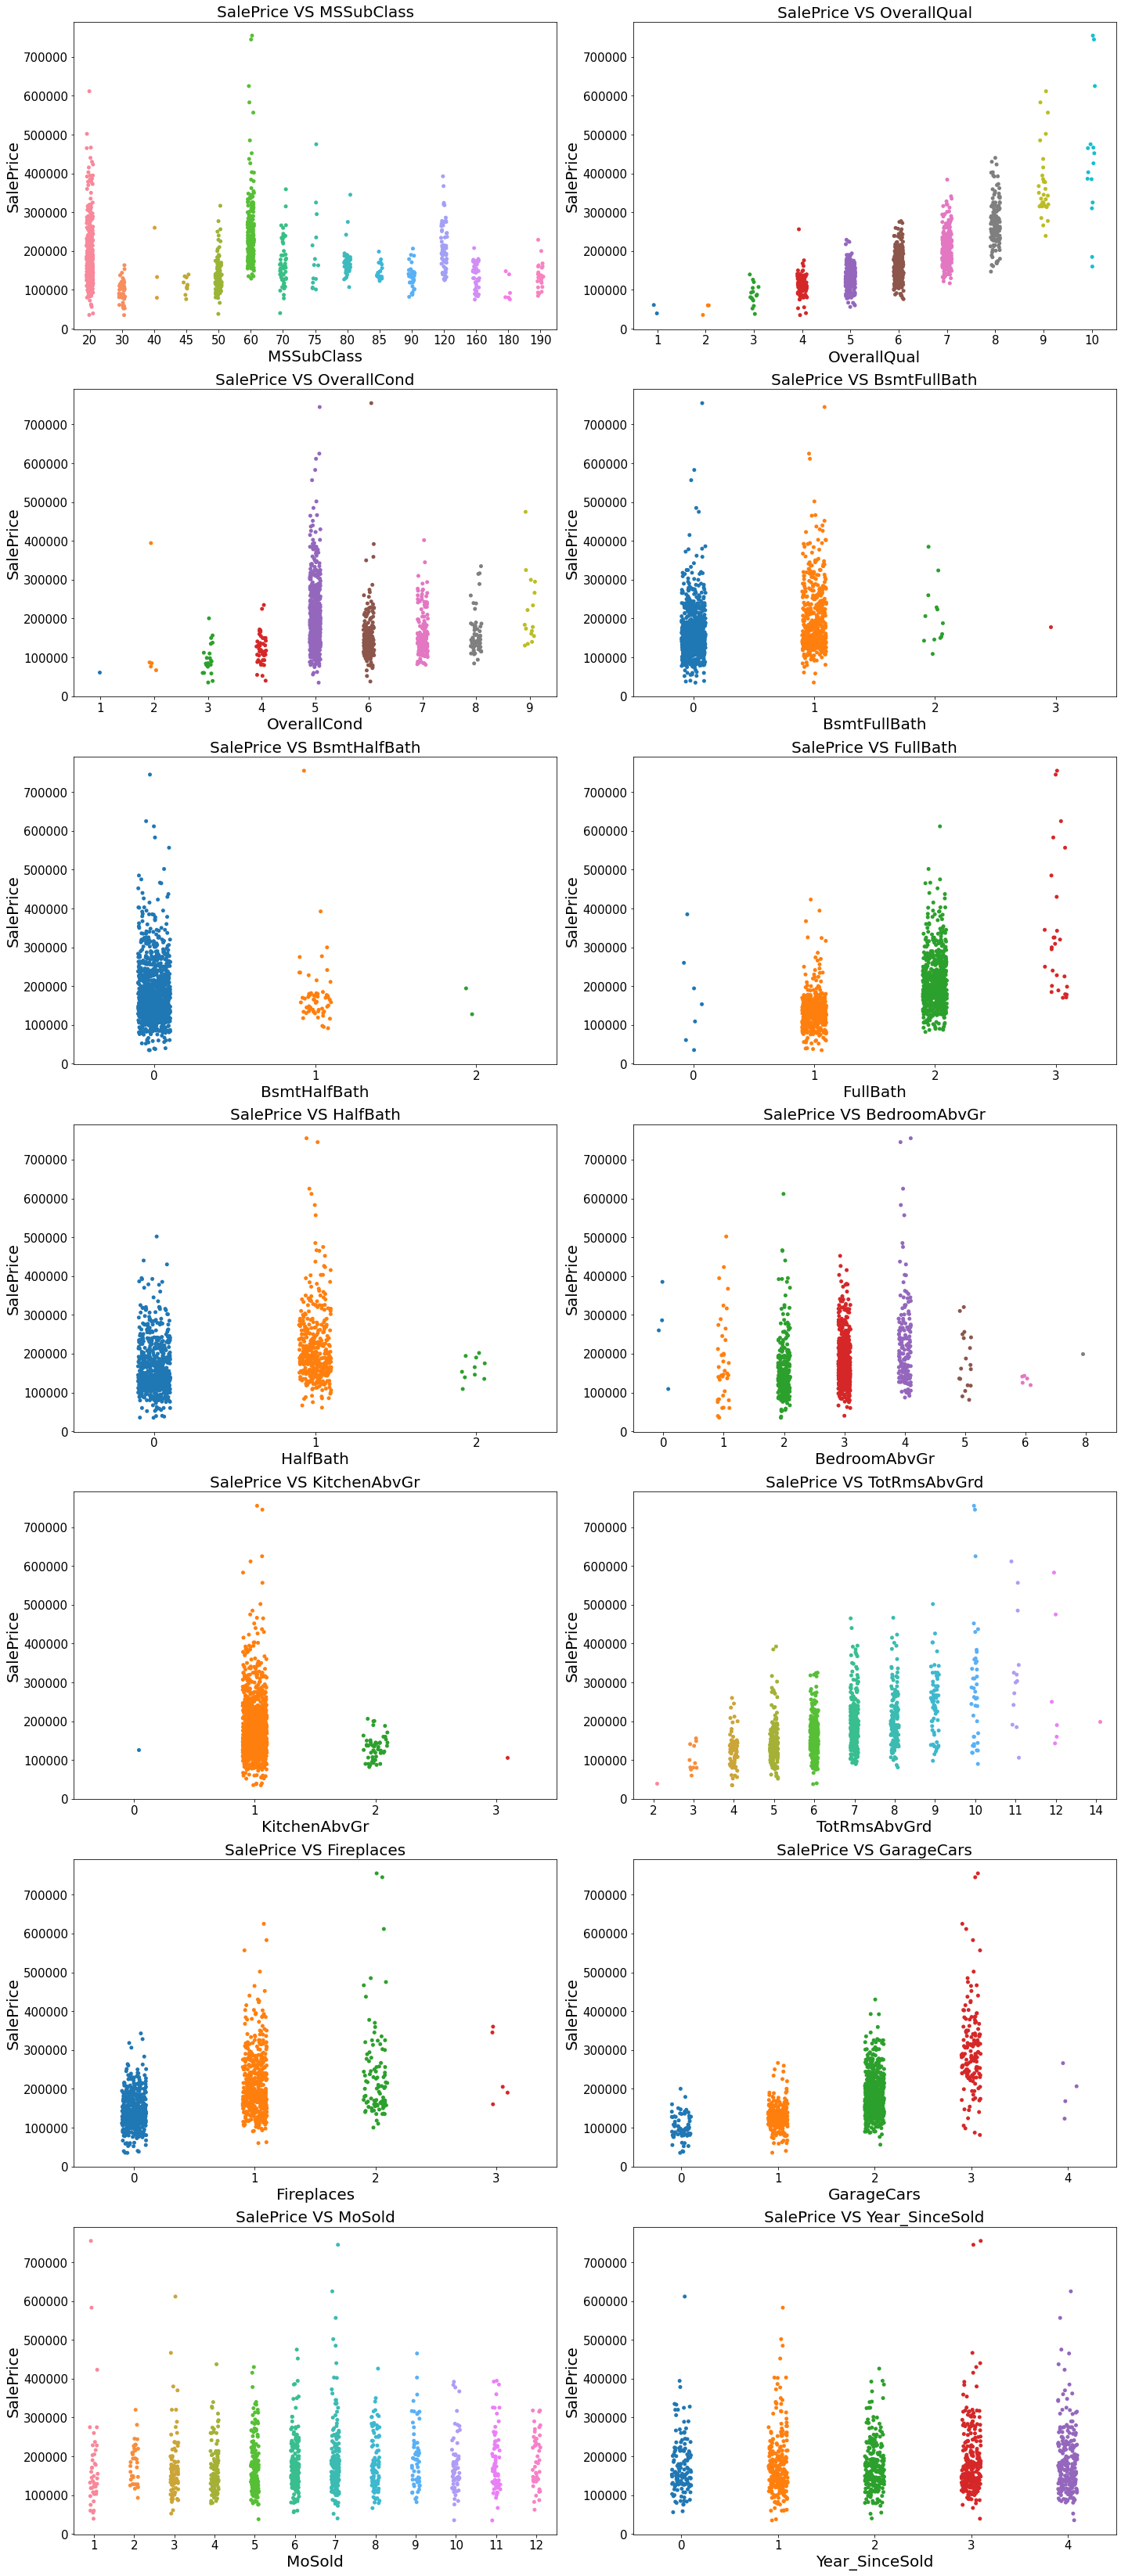

In [53]:
#stripplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col1)):
    plt.subplot(20,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

**Observations:**
- 1.For 1-STORY 1946 & NEWER ALL STYLES(20) and 2-STORY 1946 & NEWER(60) types of dwelling(MSSuubClass) the sales is good and SalePrice is also high.
- 2.As Rates the overall material and finish of the house(OverallQual) is increasing linearly sales is also increasing And SalePrice is also increasing linearly.
- 3.For 5(Average) overall condition of the house(OverallCond) the sales is high and SalePrice is also high. 
- 4.For 0 and 1 Basement full bathrooms(BsmtFullBath) the sales as well as SalePrice is high.
- 5.For 0 Basement half bathrooms(BsmtHalfBath) the sales as well as SalePrice is high.
- 6.For 1 and 2 Full bathrooms above grade(FullBath) the sales as well as SalePrice is high.
- 7.For 0 and 1 Half baths above grade(HalfBath) the sales as well as SalePrice is high. 
- 8.For 2, 3 and 4 Bedrooms above grade (does NOT include basement bedrooms)(BedroomAbvGr) the sales as well as SalePrice is high.
- 9.For 1 Kitchens above grade(KitchenAbvGr) the sales as well as SalePrice is high. 
- 10.For 4-9 Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd) the sales as well as SalePrice is high.
- 11.For 0 and 1 Number of fireplaces(Fireplaces) the sales as well as SalePrice is high.
- 12.For 1 and 2 Size of garage in car capacity(GarageCars) the sales is high and for 3 Size of garage in car capacity(GarageCars) the SalePrice is high.
- 13.In between april to august for Month Sold(MoSold) the sales is good with SalePrice.
- 14.For all the Year_SinceSold the salePrice and sales both are same.

# Bivariate Analysis for Categorical Columns:

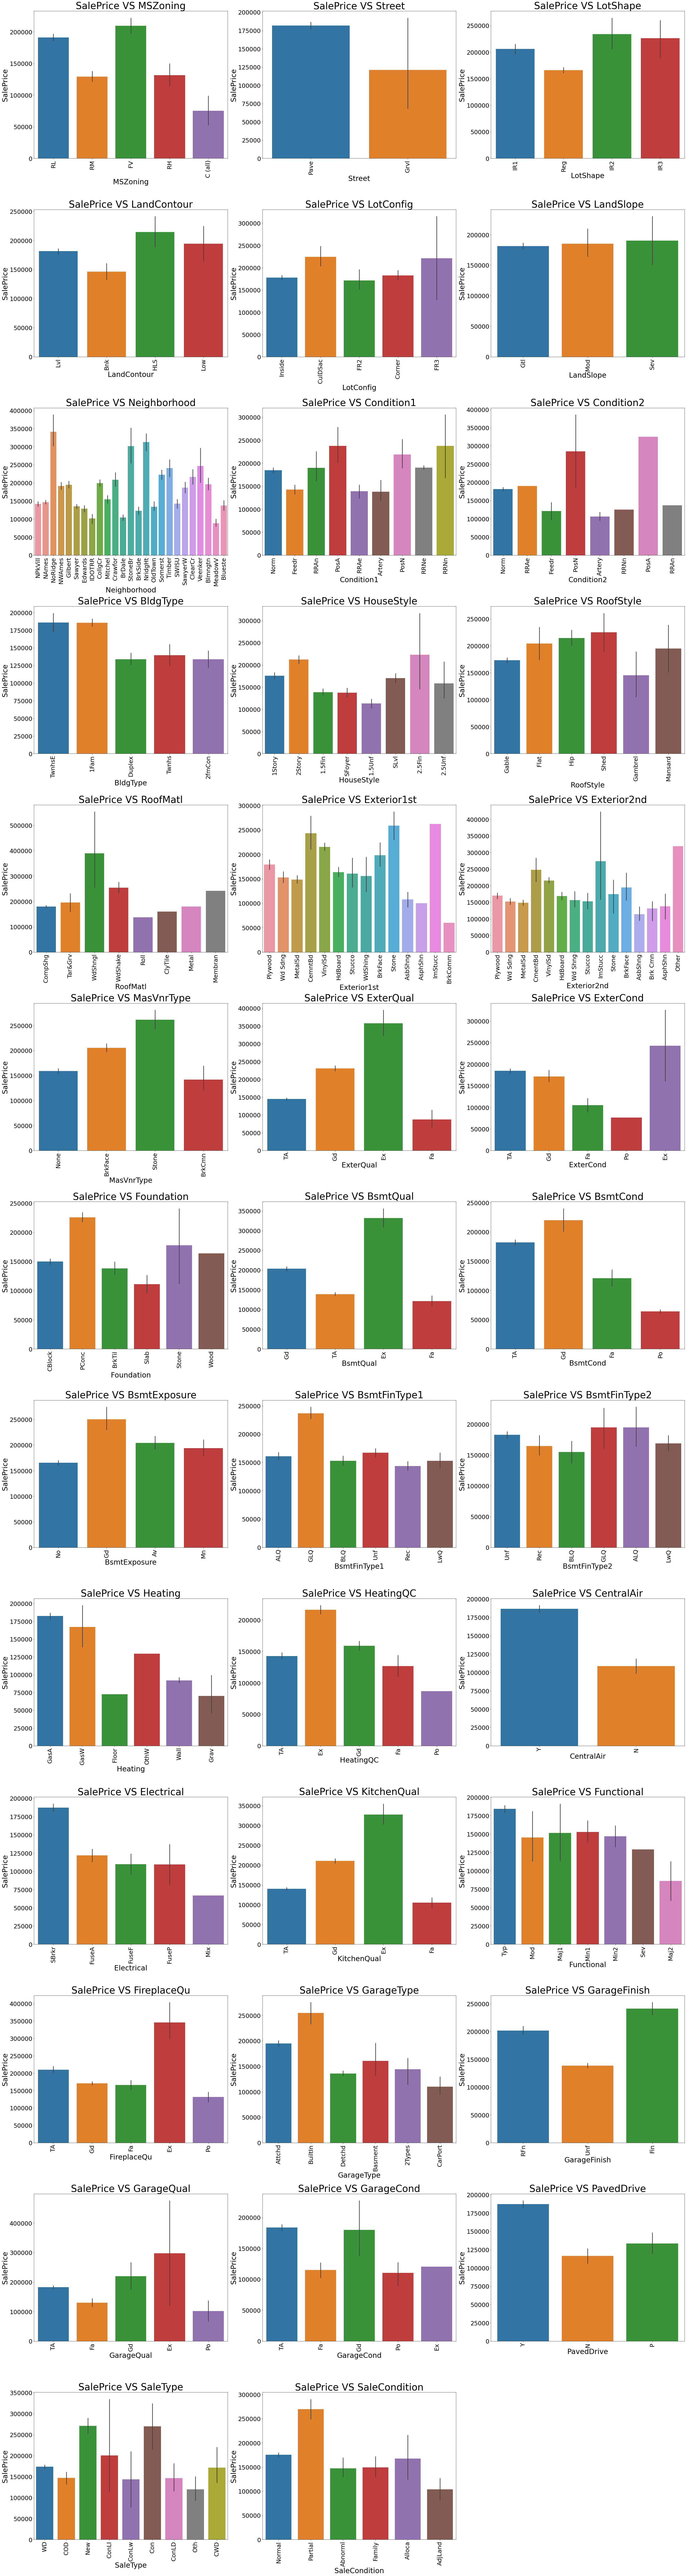

In [54]:
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

**Observations:**
- 1. For Floating Village Residential(FV) and Residential Low Density(RL) zoning classification of the sale(MSZoning) the saleprice is high.
- 2. For paved type of road access to property(Street) the SalePrice is high.
- 3. For Slightly irregular(IR1), Moderately Irregular(IR2) and Irregular(IR3) shape of property(LotShape) the SalePrice is high.
- 4. For Hillside - Significant slope from side to side(HLS) Flatness of the property(LandContour) the SalePrice is High.
- 5. For Cul-de-sac(CulDSac) Lot configuration(LotConfig) the SalePrice is High.
- 6. For all types of Slope of property(LandSlope) i.e.,Gentle slope(Gtl), Moderate Slope(Mod) and Severe Slope(Sev) the SalePrice is High.
- 7. For Northridge(NoRidge) locations within Ames city limits(Neighborhood) the SalePrice is High.
- 8. For Within 200' of North-South Railroad(RRNn), Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions(Condition1) has the maximum SalePrice.
- 9. For Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions (if more than one is present)(Condition2) has maximum SalePrice.
- 10. For Single-family Detached(1Fam) and Townhouse End Unit(TwnhsE) type of dwelling(BldgType) the SalePrice is high.
- 11. For 2Story and Two and one-half story: 2nd level finished(2.5Fin) Style of dwelling(HouseStyle) the SalePrice is high.
- 12. For Shed Type of roof(RoofStyle) the SalePrice is high.
- 13. For Wood Shingles(WdShngl) Roof material(RoofMat1) the SalePrice is high.
- 14. For Cement Board(CemntBd), Imitation Stucco(ImStucc) and Stone type of Exterior covering on house(Exterior1st) the SalePrice is high.
- 15. For Cement Board(CemntBd), Imitation Stucco(ImStucc) and other Exterior covering on house (if more than one material)(Exterior2) has maximum SalePrice.
- 16. For Stone Masonry veneer type(MasvnrType) the SalePrice is high.
- 17. For Excellent(Ex) quality of the material on the exterior(ExterQual) the SalePrice is high.
- 18. For Excellent(Ex) present condition of the material on the exterior(ExterCond) the SalePrice is high.
- 19. For Poured Contrete(PConc) Type of foundation(Foundation) the SalePrice is high.
- 20. For Excellent(100+ inches)(Ex) height of the basement(BsmtQual) the SalePrice is high.
- 21. For Good(Gd) general condition of the basement(BsmtCond) the SalePrice is high.
- 22. For Good Exposure(Gd) of walkout or garden level walls(BsmtExposure) has maximum SalePrice.
- 23. For Good Living Quarters(GLQ) of basement finished area(BsmtFinType1) has maximum SalePrice.
- 24. For Good Living Quarters(GLQ) and Average Living Quarters(ALQ) of basement finished area (if multiple types)(BsmtFinType2) has maximum SalePrice. 
- 25. For Gas forced warm air furnace(GasA) and	Gas hot water or steam heat(GasW) Type of heating(Heating) has high SalePrice.
- 26. For Excellent(Ex) Heating quality and condition(HeatingQC) the SalePriceis high.
- 27. For building having Central air conditioning(CentralAir) the SalePrice is high.
- 28. For Standard Circuit Breakers & Romex(Sbrkr) of Electrical system(Electrical) the SalePrice is Maximum.
- 29. For Excellent(Ex) Kitchen quality(KitchenQual) the SalePrice is high.
- 30. For Typical Functionality(Typ) type of Home functionality (Assume typical unless deductions are warranted)(Functional) the SalePrice is high.
- 31. For Excellent - Exceptional Masonry Fireplace(Ex) of Fireplace quality(FireplaceQual) has highest SalePrice. 
- 32. For Built-In (Garage part of house - typically has room above garage)(BuiltIn) Garage location(GarageType) the SalePrice is maximum.
- 33. For Completely finished(Fin) Interior of the garage(GarageFinish) the SalePrice is high.
- 34. For Excellent(Ex) Garage quality(GarageQual) the SalePrice is high.
- 35. For Typical/Average(TA) and Good(Gd) Garage condition(GarageCond) the SalePrice is high.
- 36. For having Paved driveway(PavedDrive) the SalePriceis high.
- 37. For Home just constructed and sold(New) and Contract 15% Down payment regular terms(Con) of type of sale(SaleType) has highest SalePrice.
- 38. For Home was not completed when last assessed (associated with New Homes)(Partial) Condition of sale(SalesCondition) the SalePrice is maximum.

# Checking for outliers:

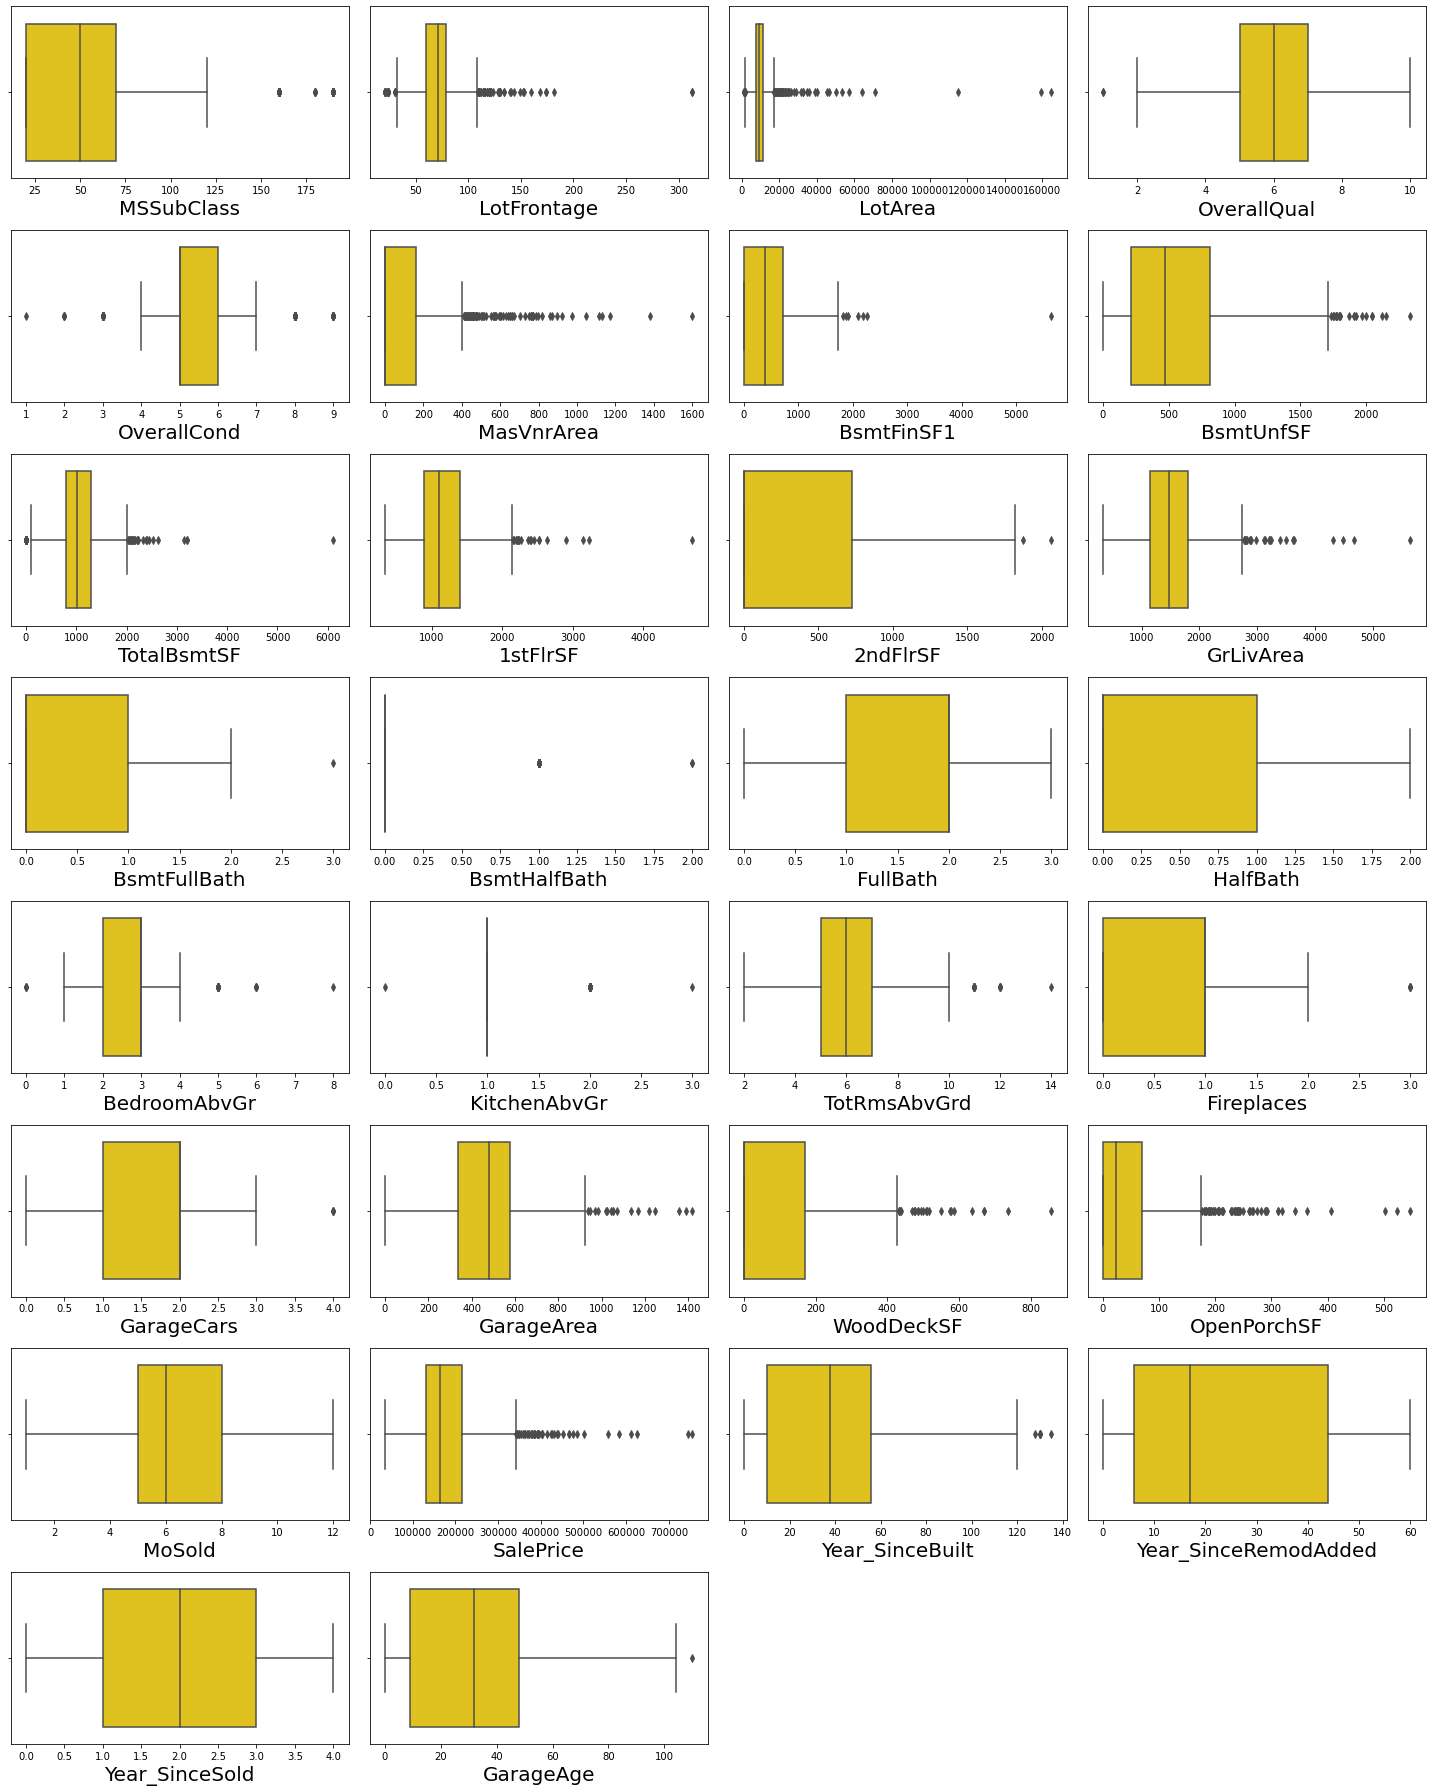

In [55]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in train dataset are
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- GarageAge
- SalePrice

 Since SalePrice is my target i should not remove outliers from this column.And MSSubClass, OverallQual and OverallCond are seems to be categorical so let me not remove outliers in this columns.

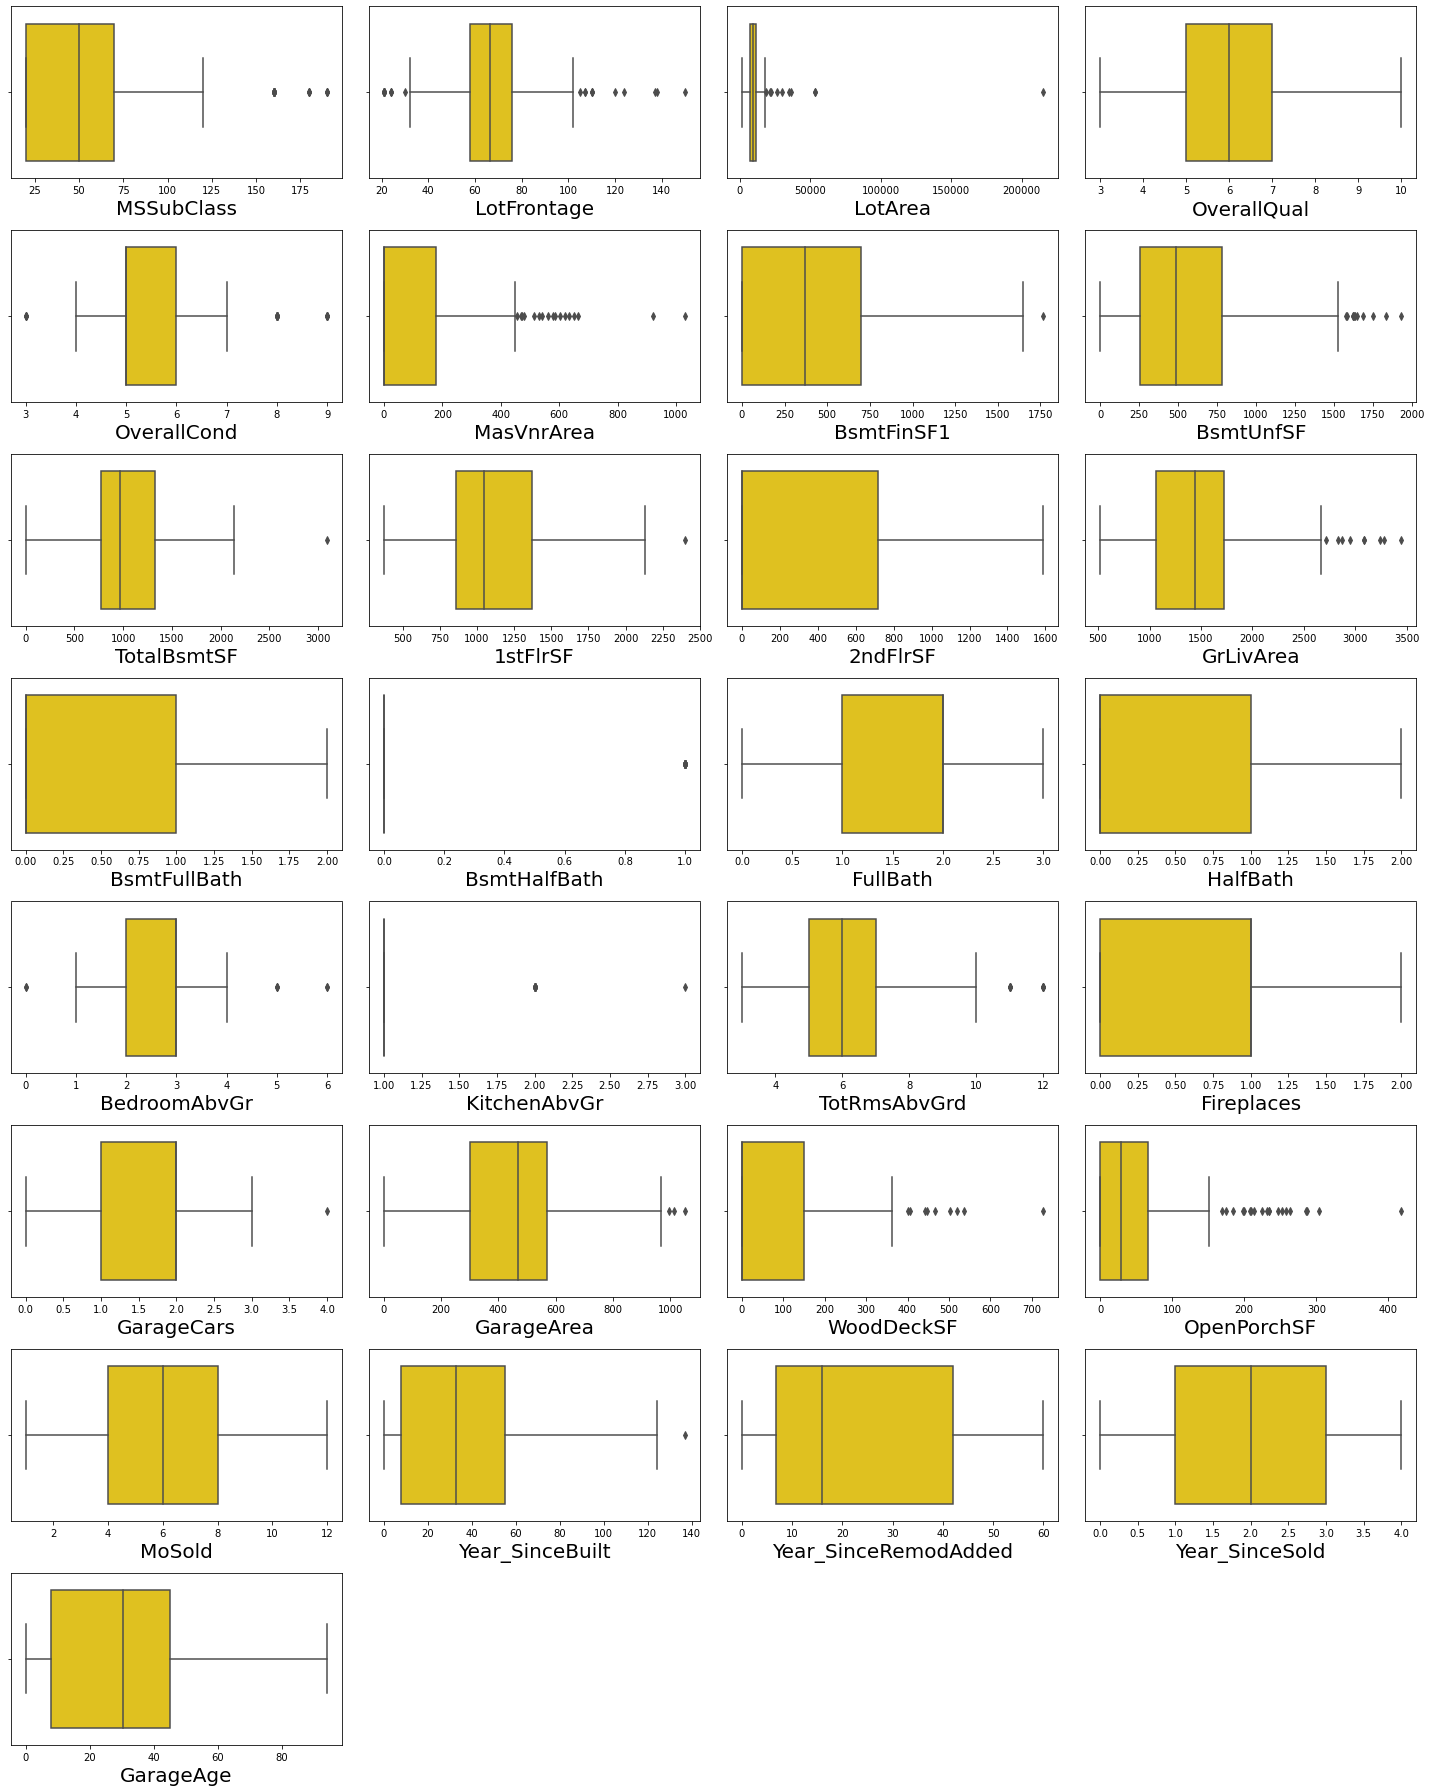

In [56]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in test dataset are

- MSSubClass
- LotFrontage
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- BsmtHalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt

MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

# Removing Outliers in train dataset:

# i) Zscore method:

In [57]:
#Features having outliers in train dataset
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

Above are the list of columns with outliers in train dataset.

In [58]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE     1Story   
1    Inside       Mod        NAmes       Norm       Norm     1Fam     1Story   
2   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
3    Inside       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
5    Inside       Gtl      Gilbert       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            6            5     Gable  CompShg     Plywood     Plywood   
1            8            6      Flat  Tar&Grv     Wd Sdng     Wd Sdng   
2            7            5     Gable  CompShg     MetalSd     MetalSd   
3            6            6       Hip  CompShg     Plywood     Plywood   
5            7            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       None         0.0        TA        TA     CBlock       Gd       TA   
1       None         0.0        Gd        Gd      PConc       TA       Gd   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3    BrkFace       480.0        TA        TA     CBlock       Gd       TA   
5       None         0.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          ALQ         120          Unf        958         1078   
1           Gd          ALQ         351          Rec       1043         2217   
2           Av          GLQ         862          Unf        255         1117   
3           No          BLQ         705          Unf       1139         1844   
5           Av          Unf           0          Unf        879          879   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        TA          Y      SBrkr       958         0        958   
1    GasA        Ex          Y      SBrkr      2217         0       2217   
2    GasA        Ex          Y      SBrkr      1127       886       2013   
3    GasA        Ex          Y      SBrkr      1844         0       1844   
5    GasA        Ex          Y      SBrkr       879       984       1863   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
5             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          TA             5        Typ           1          TA     Attchd   
1          Gd             8        Typ           1          TA     Attchd   
2          TA             8        Typ           1          TA     Attchd   
3          TA             7        Typ           1          TA     Attchd   
5          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455      

I have removed the skewness using zscore method in train dataset.

In [59]:
#Checking shape of new train dataset
df_new.shape

(953, 68)

In my new train dataset i have 953 rows and 68 columns.

In [60]:
#Checking shape of old train dataset
df.shape

(1168, 68)

 In my old train dataset i was having 1168 rows and 68 columns.

In [61]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((1168-953)/1168)*100)
Dataloss

18.40753424657534

In Z-score method for trian dataset the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [62]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of train dataset using IQR method.

In [63]:
#Checking shape of new train dataset
df_1.shape

(780, 68)

In my new train dataset i have 780 rows and 68 columns.

In [64]:
#Checking shape of old train dataset
df.shape

(1168, 68)

In my old train dataset i was having 1168 rows and 68 columns.

In [65]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((1168-780)/1168)*100)
Dataloss

33.21917808219178

In IQR method of train dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:

In [66]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

I have successfully removed outliers in train dataset using percentile method.

# Removing Outliers in test dataset:

# i) Zscore method:

In [67]:
#Features having outliers in test dataset
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]

Above are the list of columns with outliers in test dataset.

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(features1))
dff_new=dff[(z<3).all(axis=1)]
dff_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Corner       Gtl      StoneBr       Norm       Norm     1Fam     1Story   
1   CulDSac       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     1Story   
3    Inside       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4   CulDSac       Gtl      Somerst      Feedr       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            9            5       Hip  CompShg     VinylSd     VinylSd   
1            8            5     Gable  CompShg     HdBoard     HdBoard   
2            8            5       Hip  CompShg     VinylSd     VinylSd   
3            7            7     Gable  CompShg     MetalSd     MetalSd   
4            6            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0      Stone       200.0        Gd        TA      PConc       Ex       TA   
1       None         0.0        Gd        TA     CBlock       Gd       TA   
2       None         0.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     CBlock       TA       TA   
4      Stone        74.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           Gd          GLQ        1249          Unf        673         1922   
1           Av          GLQ        1036          Unf        184         1220   
2           Av          Unf           0          Unf       1753         1753   
3           No          Rec         275          Unf        429          704   
4           Mn          Unf           0          Unf        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  \
0    GasA        Ex          Y      SBrkr      1922         0       1922   
1    GasA        Gd          Y      SBrkr      1360         0       1360   
2    GasA        Ex          Y      SBrkr      1788         0       1788   
3    GasA        Ex          Y      SBrkr       860       704       1564   
4    GasA        Ex          Y      SBrkr       894      1039       1933   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         0             3             1   
1             1             0         1         0             1             1   
2             0             0         2         0             3             1   
3             0             0         1         1             3             1   
4             0             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           1          Gd     Attchd   
1          Gd             4        Typ           1          Ex     Attchd   
2          Ex             7        Typ           1          TA     Attchd   
3          Fa             7        Typ           1          Gd     Attchd   
4          Gd             9        Typ           1          Gd    BuiltIn   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          Fin           3         676         TA         TA          Y   
1          RFn           2         565         TA         TA          Y   
2          RFn           2         522      

I have removed the skewness using zscore method in test dataset.

In [69]:
#Checking shape of new test dataset
dff_new.shape

(235, 67)

In my new test dataset i have 235 rows and 67 columns.

In [70]:
#Checking shape of old test dataset
dff.shape

(292, 67)

In my old test dataset i was having 292 rows and 67 columns.

In [71]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

In Z-score method for test dataset the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [72]:
# 1st quantile
Q1=features1.quantile(0.25)

# 3rd quantile
Q3=features1.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of test dataset using IQR method.

In [73]:
#Checking shape of new test dataset
dff_1.shape

(185, 67)

In my new test dataset i have 185 rows and 67 columns.

In [74]:
#Checking shape of old test dataset
dff.shape

(292, 67)

In my old test dataset i was having 292 rows and 67 columns.

In [75]:
#Checking dataloss in IQR method of test dataset
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

In IQR method of test dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

# iii) Percentile Method:

In [76]:
#Removing outliers using percentile method in test dataset
for col1 in features1:
    if dff[col1].dtypes != 'object':
        percentile = dff[col1].quantile([0.01,0.98]).values
        dff[col][dff[col]<=percentile[0]]=percentile[0]
        dff[col][dff[col]>=percentile[1]]=percentile[1]

I have successfully removed outliers in test dataset using percentile method

# Checking for skewness:

In [77]:
#Checking for skewness of train dataset
df.skew()

MSSubClass              1.422019
LotFrontage             0.188060
LotArea                 1.191912
OverallQual             0.175082
OverallCond             0.580714
MasVnrArea              1.873138
BsmtFinSF1              0.639523
BsmtUnfSF               0.777624
TotalBsmtSF             0.166773
1stFlrSF                0.645842
2ndFlrSF                0.717390
GrLivArea               0.592755
BsmtFullBath            0.355224
BsmtHalfBath            3.954345
FullBath                0.057809
HalfBath                0.656492
BedroomAbvGr           -0.145762
KitchenAbvGr            4.374289
TotRmsAbvGrd            0.443931
Fireplaces              0.552677
GarageCars             -0.434745
GarageArea             -0.135675
WoodDeckSF              1.053617
OpenPorchSF             1.513678
MoSold                  0.220979
SalePrice               1.953878
Year_SinceBuilt         0.468682
Year_SinceRemodAdded    0.495864
Year_SinceSold         -0.115765
GarageAge               0.608757
dtype: flo

The columns with skewness in train dataset
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- SalePrice
- GarageAge

But as SalePrice is my target i should not remove skewness in this column.And MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In [78]:
#Checking for skewness of test dataset
dff.skew()

MSSubClass               1.358597
LotFrontage              0.466813
LotArea                 12.781805
OverallQual              0.397312
OverallCond              1.209714
MasVnrArea               1.976804
BsmtFinSF1               0.739790
BsmtUnfSF                0.960708
TotalBsmtSF              0.519257
1stFlrSF                 0.692047
2ndFlrSF                 0.765511
GrLivArea                1.010586
BsmtFullBath             0.463685
BsmtHalfBath             3.544994
FullBath                -0.049800
HalfBath                 0.758892
BedroomAbvGr             0.075315
KitchenAbvGr             4.849432
TotRmsAbvGrd             0.805535
Fireplaces               0.540164
GarageCars              -0.280324
GarageArea               0.133547
WoodDeckSF               1.708221
OpenPorchSF              2.185030
MoSold                   0.186504
Year_SinceBuilt          0.755233
Year_SinceRemodAdded     0.535600
Year_SinceSold          -0.018412
GarageAge                0.000000
dtype: float64

The columns with skewness in test dataset
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- Year_SinceRemodAdded

MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

In GarageAge skewness is zero which means all the entries in this column are same so let me drop it in test dataset. Since i'm dropping in test i should drop in train also.

In [79]:
#Dropping unnecessary column in train dataset
df = df.drop(["GarageAge"],axis=1)

In [80]:
#Dropping unnecessary column in test dataset
dff = dff.drop(["GarageAge"],axis=1)

# Removing skewness using yeo-johnson method for train dataset:

In [81]:
#Creating a list of skewed features in train dataset
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

Taking a list as fea with all the columns with skewness in train dataset.

In [82]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness in train dataset.

In [83]:
df[fea] = scaler.fit_transform(df[fea].values)

Got removed from skewness.

In [84]:
#Checking skewness again in train dataset
df[fea].skew()

LotArea         0.077862
MasVnrArea      0.415092
BsmtFinSF1     -0.418554
BsmtUnfSF      -0.304290
1stFlrSF       -0.000731
2ndFlrSF        0.279883
GrLivArea      -0.005974
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr    0.000000
Fireplaces      0.076595
WoodDeckSF      0.110387
OpenPorchSF    -0.010092
dtype: float64

After removing skewness i'm getting skewness of KitchenAbvGr as 00000 which means this column has a unique single entry. So this column will create problem for us let me drop this column.

In [85]:
#Dropping unnecessary column
df = df.drop(["KitchenAbvGr"],axis=1)

# Removing skewness using yeo-johnson method for test dataset:

In [86]:
#Creating a list of skewed features in test dataset
fea1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded']

Taking a list as fea with all the columns with skewness in test dataset.

In [87]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i have removing the skewness in test dataset.

In [88]:
dff[fea1] = scaler.fit_transform(dff[fea1].values)

Got removed from skewness.

In [89]:
#Checking skewness again in test dataset
dff[fea1].skew()

LotArea                 0.003111
MasVnrArea              0.363253
BsmtFinSF1             -0.441605
BsmtUnfSF              -0.232099
1stFlrSF               -0.000548
2ndFlrSF                0.284246
GrLivArea              -0.000307
BsmtHalfBath            3.544994
HalfBath                0.621093
KitchenAbvGr            4.253608
TotRmsAbvGrd           -0.000469
Fireplaces              0.076669
WoodDeckSF              0.210102
OpenPorchSF            -0.058951
Year_SinceBuilt        -0.147007
Year_SinceRemodAdded   -0.081089
dtype: float64

After removing skewness i'm getting skewness of KitchenAbvGr as 4.2536.Since i have removed this column in train dataset to get same allingment let me drop in test also.

In [90]:
#Dropping unnecessary column
dff = dff.drop(["KitchenAbvGr"],axis=1)

# Ordinal Encoding:

In [91]:
#Replacing ratings with suitable numbers in required columns in train dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    df[i] = df[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

In [92]:
#Replacing ratings with suitable numbers in required columns in test dataset
column = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for i in column:
    dff[i] = dff[i].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0})

I have replaced all rating entries with required numbers.

In [93]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [94]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))

I have encoded all my categorical columns in train and test datasets using Ordinal encoder.

# Checking correlation using heat map:

In [95]:
#Correlation of train dataset
cor=df.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.391424 -0.400825 -0.035981   
MSZoning                0.007478  1.000000    -0.084834 -0.058912  0.140215   
LotFrontage            -0.391424 -0.084834     1.000000  0.596143 -0.044573   
LotArea                -0.400825 -0.058912     0.596143  1.000000 -0.072669   
Street                 -0.035981  0.140215    -0.044573 -0.072669  1.000000   
LotShape                0.104485  0.053655    -0.157341 -0.287003 -0.012941   
LandContour            -0.021387  0.001175    -0.016620 -0.074834  0.105226   
LotConfig               0.076880 -0.027246    -0.201691 -0.198998  0.000153   
LandSlope              -0.014930 -0.023952     0.023253  0.176280 -0.141572   
Neighborhood            0.013918 -0.251833     0.091671  0.075420  0.001420   
Condition1             -0.042474 -0.025651    -0.022579  0.069366  0.002189   
Condition2             -0.044319  0.031959     0.011970  0.056741  0.001406   
BldgType                0.731815 -0.024776    -0.467073 -0.524128 -0.013606   
HouseStyle              0.381585 -0.110991     0.057902  0.005503  0.016793   
OverallQual             0.070462 -0.134037     0.230687  0.190547  0.057140   
OverallCond            -0.056978  0.189553    -0.051887  0.010314  0.031082   
RoofStyle              -0.100641  0.000913     0.168101  0.119446 -0.006875   
RoofMatl               -0.032214  0.009719     0.063294  0.220463  0.007889   
Exterior1st            -0.090178 -0.012037     0.079942  0.079181  0.012482   
Exterior2nd            -0.120022  0.005548     0.108934  0.095689  0.014618   
MasVnrType             -0.013252 -0.033521    -0.066054 -0.019842  0.000822   
MasVnrArea              0.022091 -0.037361     0.166180  0.076589  0.020075   
ExterQual               0.032564 -0.160447     0.158712  0.097839  0.091807   
ExterCond              -0.051385  0.097907    -0.001004  0.070513 -0.028096   
Foundation              0.053951 -0.244844     0.090652  0.009319  0.032701   
BsmtQual                0.070818 -0.206193     0.163680  0.116129  0.027107   
BsmtCond               -0.009496 -0.041842     0.047333  0.047736  0.002199   
BsmtExposure           -0.068192  0.037414    -0.121117 -0.144857  0.065253   
BsmtFinType1            0.017515  0.021518    -0.028977 -0.043423 -0.006420   
BsmtFinSF1             -0.041361 -0.036041     0.087060  0.119301  0.008924   
BsmtFinType2            0.040573 -0.031322    -0.015941 -0.073788  0.045208   
BsmtUnfSF              -0.133695 -0.032954     0.130111  0.052521  0.030988   
TotalBsmtSF            -0.229300 -0.065060     0.318263  0.332367  0.016841   
Heating                 0.047734  0.051188    -0.036713 -0.021160  0.006981   
HeatingQC               0.005480 -0.149446     0.084699  0.047385  0.038560   
CentralAir             -0.113883 -0.015887     0.087970  0.073866  0.043024   
Electrical              0.045533 -0.079205     0.073880  0.053827  0.038720   
1stFlrSF               -0.264403 -0.037611     0.394878  0.452791  0.009913   
2ndFlrSF                0.355020 -0.016193    -0.036998  0.009290  0.026241   
GrLivArea               0.096452 -0.086858     0.318133  0.397820  0.052837   
BsmtFullBath           -0.011290 -0.009900     0.070859  0.108691 -0.010398   
BsmtHalfBath           -0.000125  0.006809     0.011408  0.043299  0.013997   
FullBath                0.140807 -0.188837     0.180823  0.187219  0.033208   
HalfBath                0.165938 -0.125164     0.049731  0.061575  0.045883   
BedroomAbvGr           -0.037908 -0.000610     0.278173  0.297515  0.028722   
KitchenQual             0.019462 -0.133170     0.158665  0.127004  0.068306   
TotRmsAbvGrd            0.049001 -0.024508     0.323070  0.369388  0.039782   
Functional              0.022913 -0.091684     0.037977 -0.025038 -0.015309   
Fireplaces             -0.032338  0.009349     0.227523  0.328380  0.021069   
FireplaceQu             0.013901 -0.011942    -0.059379 -0.096589 -0.027

Above are the correlations of all the pair of features of train dataset.To get better visualization on the correlation of features,let me plot it using heat map.

In [96]:
#Correlation of test dataset
cor=dff.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.559657  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.335805 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.623700 -0.056531   
LotArea                -0.559657 -0.335805     0.623700  1.000000 -0.099348   
Street                  0.004588 -0.063162    -0.056531 -0.099348  1.000000   
LotShape                0.176681  0.167716    -0.147720 -0.294907 -0.002444   
LandContour             0.068736 -0.099137    -0.086163 -0.139905  0.153613   
LotConfig               0.071784  0.055261    -0.124470 -0.150922  0.058229   
LandSlope              -0.073979 -0.035312     0.176406  0.429145 -0.324146   
Neighborhood           -0.081962 -0.204984     0.184817  0.184733 -0.045972   
Condition1              0.042599 -0.059909     0.064350  0.059812 -0.246714   
Condition2             -0.036770  0.105995    -0.018887 -0.034579  0.004868   
BldgType                0.798007  0.230251    -0.436593 -0.588876 -0.028820   
HouseStyle              0.455233 -0.068366    -0.080950 -0.082811  0.043073   
OverallQual            -0.116077 -0.276394     0.254760  0.217092  0.066173   
OverallCond            -0.068113  0.191126    -0.096571 -0.099886  0.077702   
RoofStyle              -0.183492 -0.031210     0.199222  0.234422 -0.054925   
RoofMatl               -0.019367 -0.022604     0.077308  0.035262  0.006540   
Exterior1st            -0.103303 -0.028611     0.018168  0.070080 -0.021532   
Exterior2nd            -0.202425 -0.028994     0.035881  0.090332 -0.019729   
MasVnrType             -0.092343  0.010358     0.055159  0.002839  0.036783   
MasVnrArea              0.041990 -0.125356     0.108944  0.057879 -0.015019   
ExterQual              -0.047717 -0.327079     0.185375  0.165959  0.128016   
ExterCond              -0.120495  0.065494    -0.072894 -0.025418  0.024868   
Foundation              0.072808 -0.195382     0.130965  0.073686  0.043091   
BsmtQual                0.099330 -0.219848     0.162885  0.113234  0.009123   
BsmtCond                0.016528 -0.139784     0.043670  0.048353  0.003768   
BsmtExposure           -0.049358  0.050552    -0.114149 -0.171785  0.099047   
BsmtFinType1            0.003453  0.038716    -0.007482  0.003165 -0.037657   
BsmtFinSF1             -0.080689 -0.140046     0.097369  0.136856 -0.038548   
BsmtFinType2            0.043449 -0.015825    -0.115149 -0.008923  0.110019   
BsmtUnfSF              -0.196697 -0.140089     0.157696  0.113707  0.095286   
TotalBsmtSF            -0.336822 -0.270929     0.398795  0.408620 -0.029632   
Heating                 0.049709  0.094397     0.011852  0.059190  0.011782   
HeatingQC              -0.116916 -0.225763     0.098609  0.068964  0.060962   
CentralAir             -0.053192 -0.235065     0.031703  0.060219  0.156680   
Electrical              0.075568 -0.035888     0.020348 -0.001966 -0.025961   
1stFlrSF               -0.390978 -0.227152     0.458767  0.495823 -0.012989   
2ndFlrSF                0.400684  0.017233    -0.080395 -0.052562  0.072274   
GrLivArea               0.030653 -0.211886     0.348015  0.397836  0.050722   
BsmtFullBath           -0.000676 -0.084559     0.085464  0.148346 -0.094062   
BsmtHalfBath           -0.041577 -0.017534    -0.044632  0.067735  0.021908   
FullBath                0.095903 -0.236326     0.227718  0.210105  0.087362   
HalfBath                0.210890 -0.181873     0.031989  0.066096 -0.025380   
BedroomAbvGr           -0.061750 -0.104881     0.227534  0.307383  0.030347   
KitchenQual            -0.134592 -0.266916     0.181377  0.137635  0.058313   
TotRmsAbvGrd           -0.031809 -0.153357     0.330815  0.399155  0.067617   
Functional             -0.075457 -0.131738    -0.002318  0.047121 -0.018670   
Fireplaces             -0.074559 -0.169600     0.256905  0.293361 -0.027697   
FireplaceQu            -0.083281  0.050584     0.000598  0.023628  0.033

Above are the correlations of all the pair of features of test dataset.To get better visualization on the correlation of features,let me plot it using heat map.

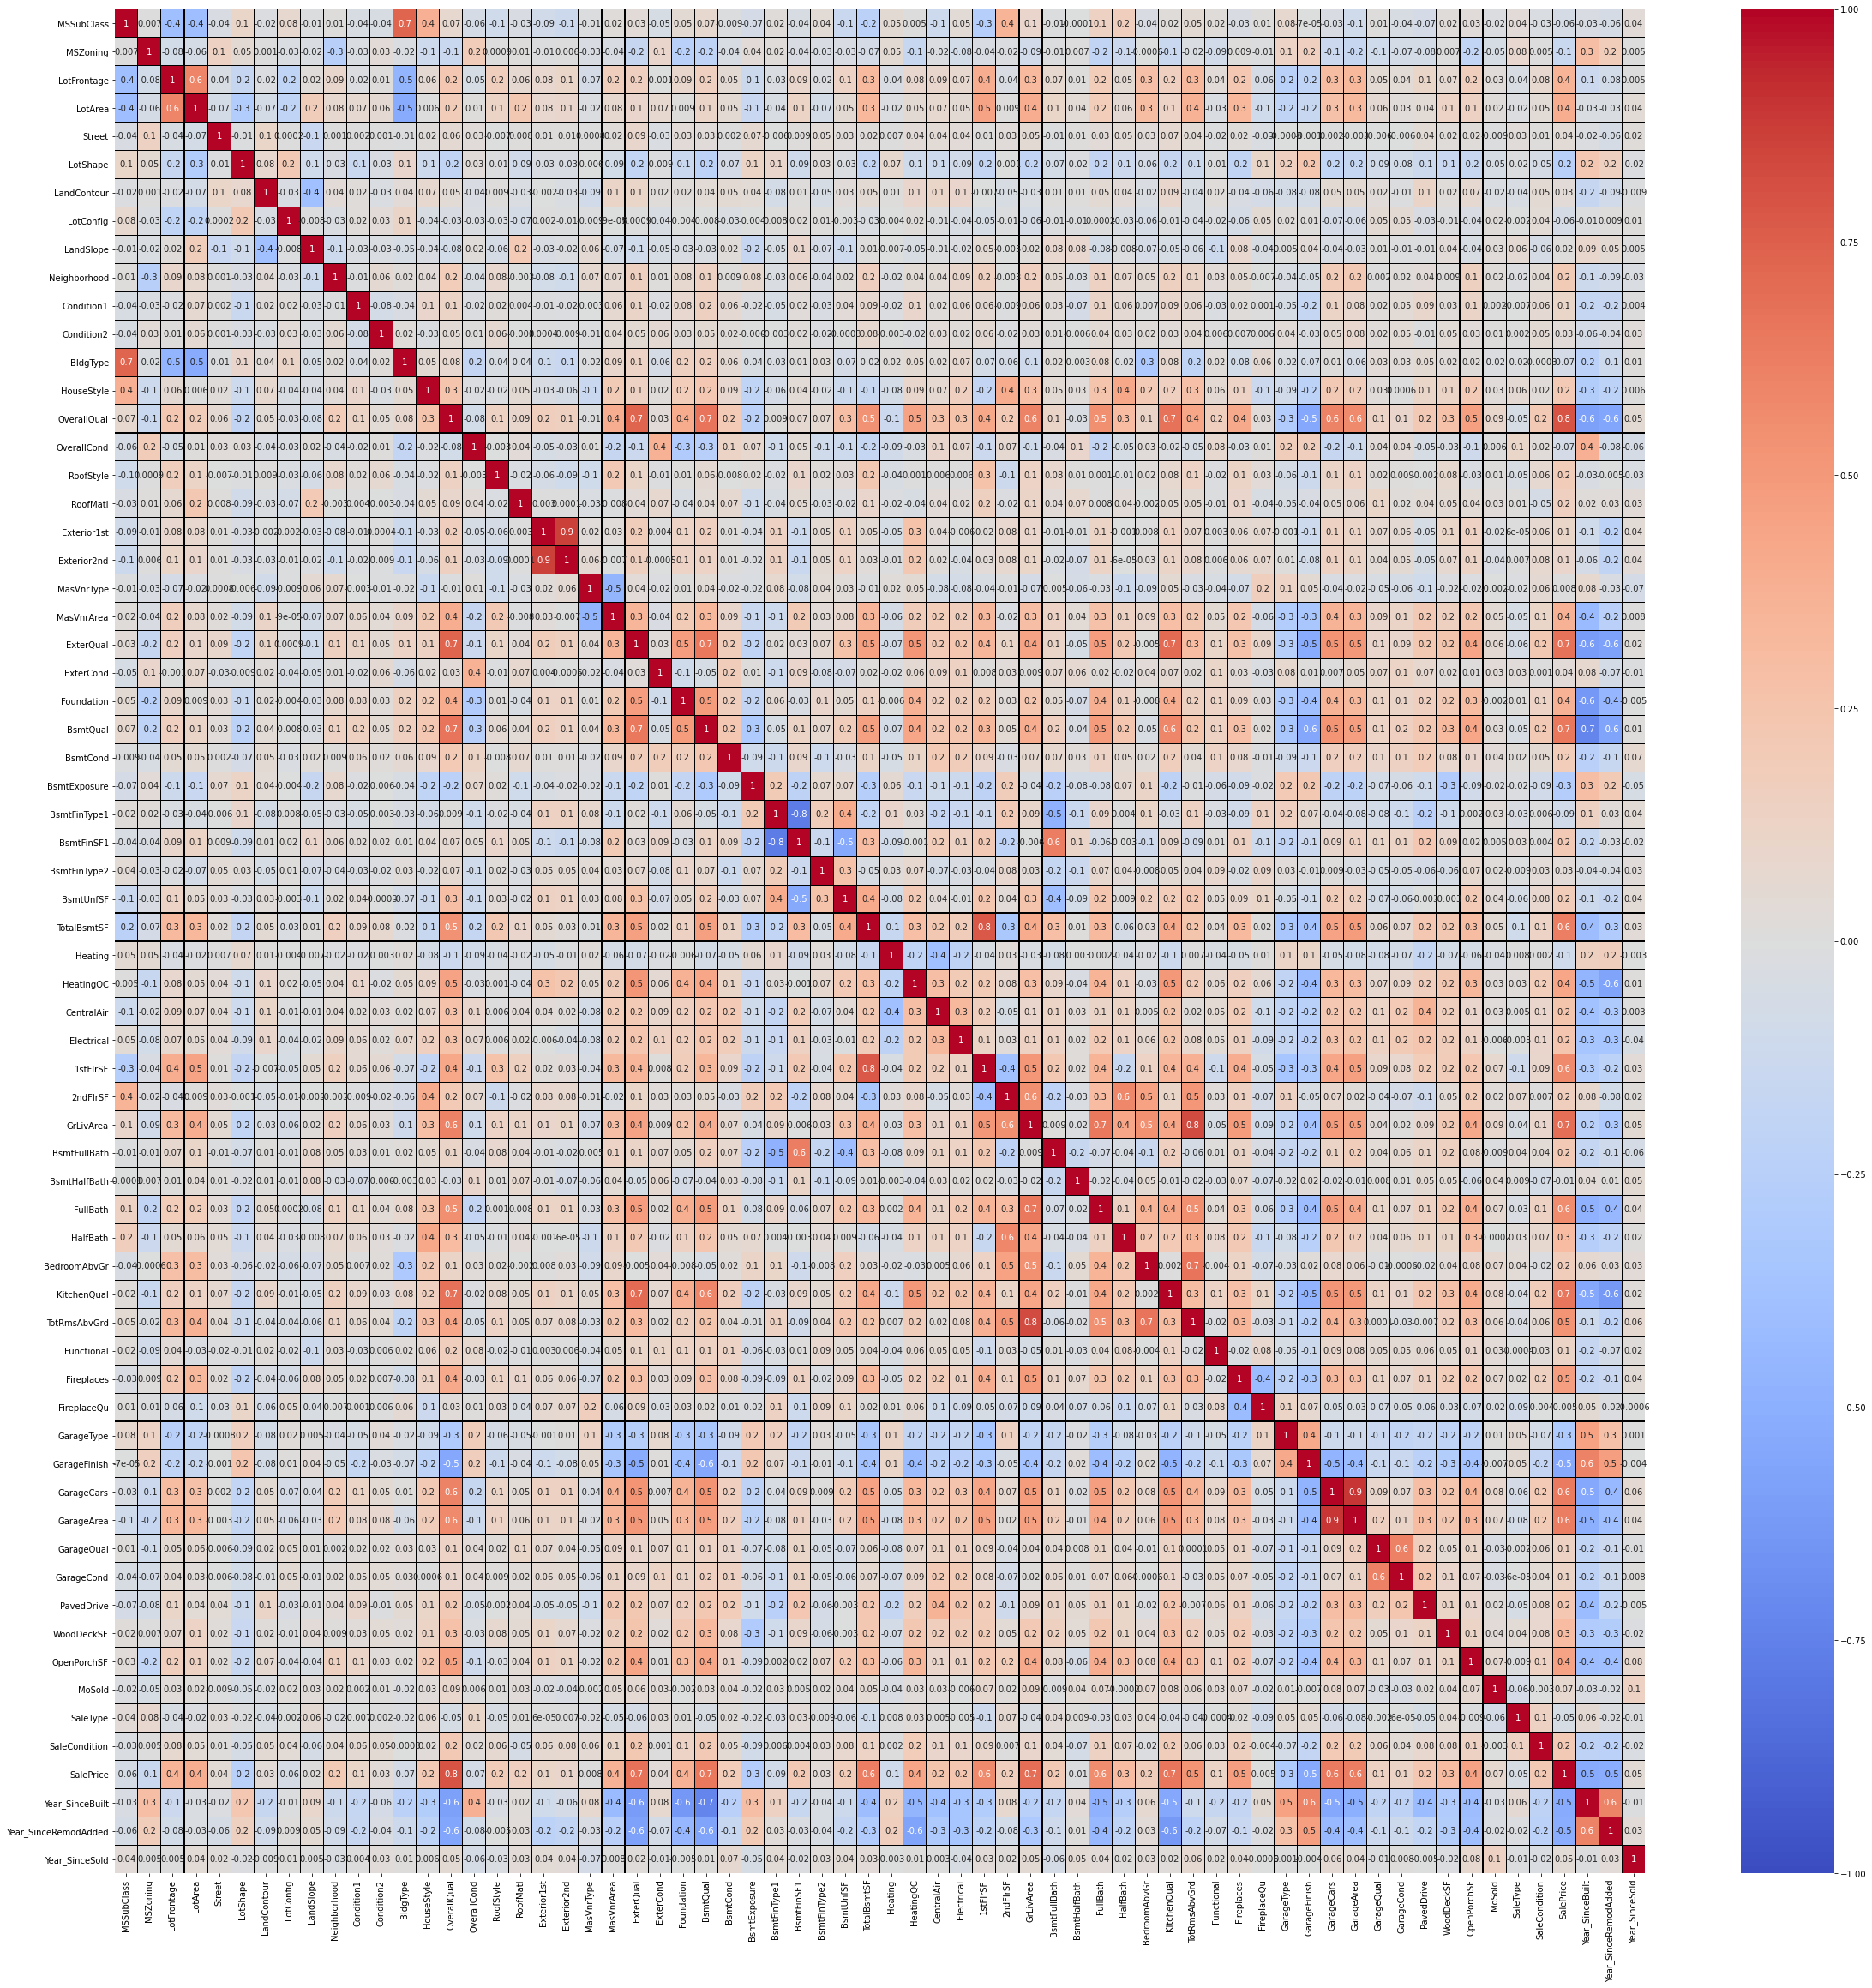

In [97]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

I can clearly observe a multicolinearity issue in some of the features of train dataset so i have to check VIF and Let me plot a bar graph to get better insight on targets correlation with other features.

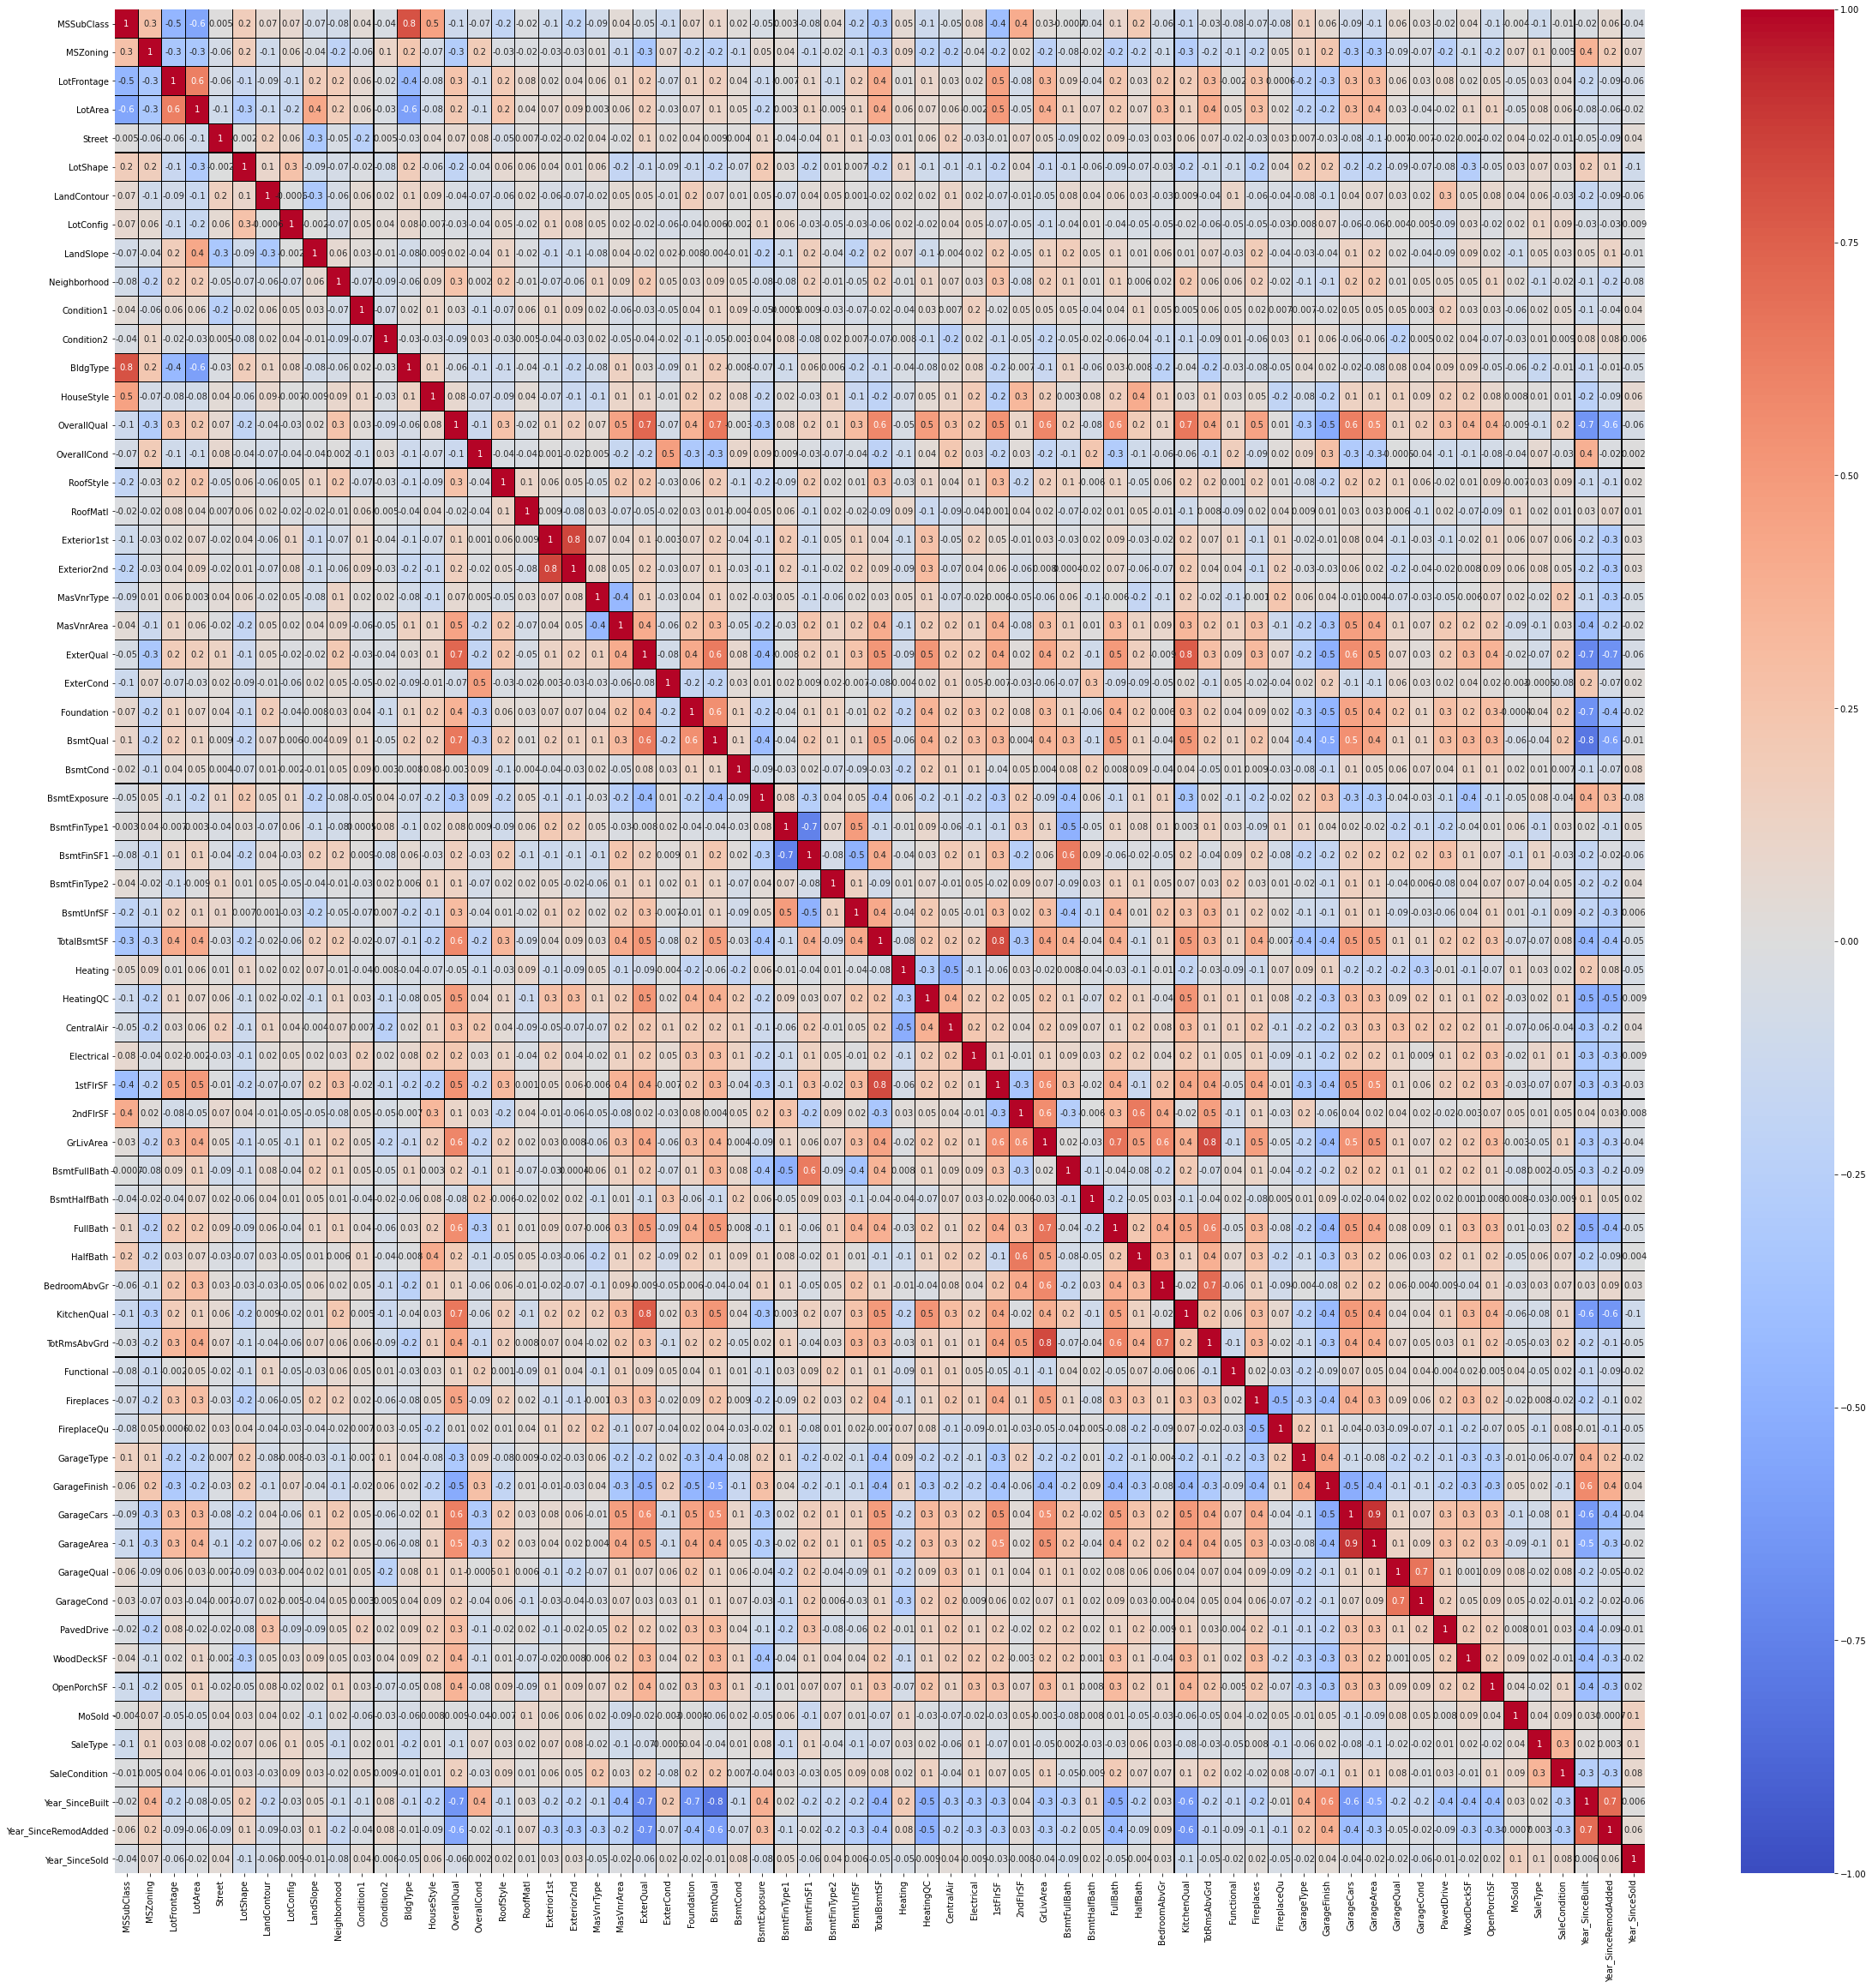

In [98]:
# Visualizing the correlation matrix by plotting heat map for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

I can clearly observe a multicolinearity issue in some of the features of test dataset so i have to check VIF and Let me plot a bar graph to get better insight on targets correlation with other features.

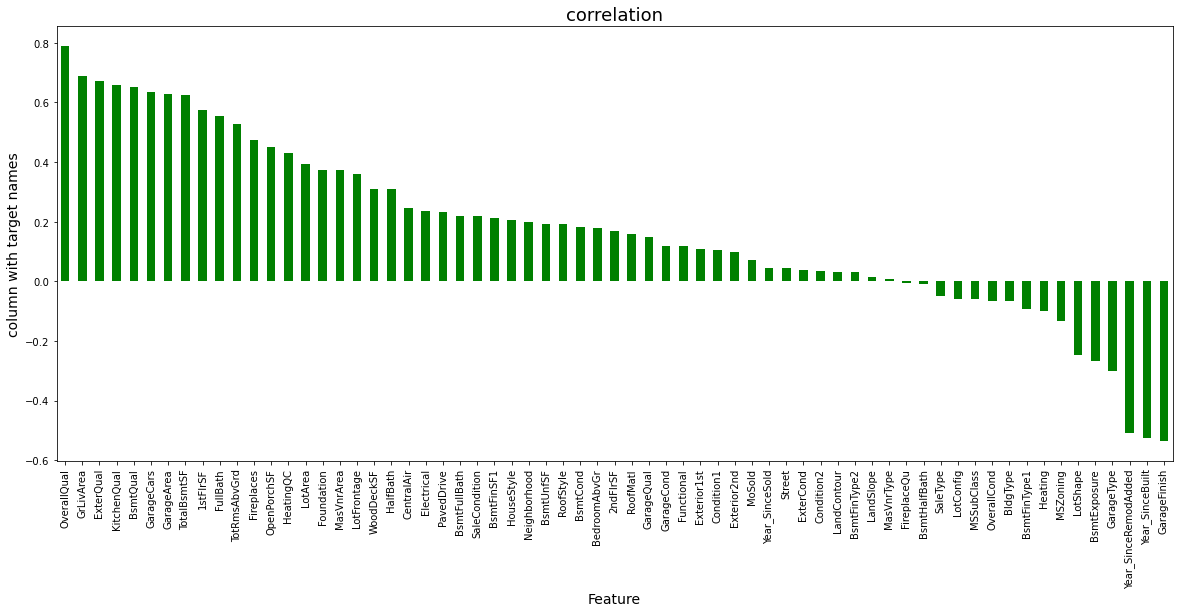

In [99]:
plt.figure(figsize=(20,8))
df.corr()['SalePrice'].sort_values(ascending=False).drop(['SalePrice']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Clearly i can see that MasVnrType and ForeplaceQu are less correlated with target but let me keep those columns as it is and continue.

# Separating features and label in train dataset:

In [100]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

I have separated my target and independent columns.

# Scaling the train data using standard scaler:

In [101]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my train data using standard scaler.

In [102]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.039092 -1.306083  0.058621 -1.373107   
1   -0.877042 -0.021646     1.321126  1.356458  0.058621 -1.373107   
2    0.077095 -0.021646     1.160948  0.113089  0.058621 -1.373107   
3   -0.877042 -0.021646     1.855050  0.530989  0.058621 -1.373107   
4   -0.877042 -0.021646     0.039092  1.497522  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822896  -0.700004  -0.223988   
1     1.079014     1.050880    0.395209   -0.822896   1.032209   2.589114   
2    -0.535912    -0.682775    0.395209   -0.822896   1.032209  -0.223988   
3    -0.212927    -0.104890   -1.241686    1.385487  -0.700004  -0.223988   
4    -1.504868    -1.549602    2.032104    1.140684   1.032209  -0.223988   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836  0.647378 -0.037507      0.635539     -1.523529   -0.117054   
1    0.852451 -0.832343  3.332324     -1.113129     -1.523529    0.395541   
2    0.852451  0.647378 -0.037507     -1.987463     -0.434828    0.934402   
3   -0.557836  0.647378 -0.037507      0.635539     -0.979178    0.803940   
4   -0.557836  0.647378 -0.037507      0.635539     -1.523529    1.189724   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.916764     0.067300 -0.11909  -1.178317    0.267506   
1     -0.771186   1.042594     2.453434 -0.11909   0.903792    0.267506   
2      0.310141  -0.510359     0.165553 -0.11909   0.903792    0.267506   
3      0.310141   1.178365     1.997087 -0.11909   0.903792    0.267506   
4      0.310141  -0.230032     1.387415 -0.11909  -0.137262    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.299036 -0.481887 -0.871789  -1.281768     -0.838227     -0.238775   
1    0.299036  2.082190 -0.871789   1.377184      1.192995     -0.238775   
2    0.299036  0.048689  1.177246   1.060650      1.192995     -0.238775   
3    0.299036  1.665038 -0.871789   0.775546     -0.838227     -0.238775   
4    0.299036  1.201931 -0.871789   0.322952     -0.838227      4.188040   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.793082 -0.782707     -1.144966    -0.788838     -1.009429    0.261146   
1  0.793082 -0.782707      1.475072     0.716657      0.975397    0.261146   
2  0.793082  1.268421      0.165053    -0.788838      0.975397    0.261146   
3  0.793082 -0.782707      0.165053    -0.788838      0.313788    0.261146   
4  0.793082 -0.782707      0.165053     0.716657      0.975397    0.261146   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.779453    -1.163409   -0.693653     -0.288773    0.307737   -0.163806   
1    0.779453    -1.163409   -0.693653      0.946709    0.307737    0.717359   
2    0.779453    -1.163409   -0.693653      0.946709    0.307737   -0.090782   
3    0.779453    -1.163409   -0.693653     -0

This is the train data of independent variables after scaling.

# Scaling the test data using standard scaler:

In [103]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

I have scaled my test data using standard scaler.

In [104]:
X_1.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0   -0.856054 -0.287006     0.981605  0.842656  0.083045 -1.402669   
1    1.431981 -0.287006     0.000000 -0.739104  0.083045 -1.402669   
2   -0.856054 -0.287006     0.000000  0.524304  0.083045  0.745474   
3    0.287963 -0.287006     0.429998  0.548484  0.083045  0.745474   
4    0.059160 -0.287006     0.981605  0.897263  0.083045 -1.402669   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0    -2.566101  -2.001106  -0.226274      1.554460   -0.028763   -0.058621   
1     0.299297  -1.351136  -0.226274      1.554460   -0.028763   -0.058621   
2     0.299297   0.598774  -0.226274     -1.281387   -0.028763   -0.058621   
3    -3.998799   0.598774  -0.226274     -1.114572   -0.028763   -0.058621   
4     0.299297  -1.351136  -0.226274      1.387645   -1.228602   -0.058621   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0 -0.444642   -0.518671     2.157766    -0.464603   1.846195 -0.078757   
1  2.722077   -0.518671     1.419117    -0.464603  -0.523427 -0.078757   
2 -0.444642   -0.518671     1.419117    -0.464603   1.846195 -0.078757   
3 -0.444642    1.011146     0.680468     1.419621  -0.523427 -0.078757   
4 -0.444642    1.011146    -0.058181    -0.464603  -0.523427 -0.078757   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0     0.694397     0.733065    1.952161    1.182923   1.137790  -0.299447   
1    -1.046066    -1.248926    0.355435   -0.846534   1.137790  -0.299447   
2     0.694397     0.733065    0.355435   -0.846534   1.137790  -0.299447   
3    -0.610950    -0.588262    0.355435   -0.846534  -0.648418  -0.299447   
4     0.694397     0.733065    1.952161    0.952580   1.137790  -0.299447   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0    0.776109  2.077301 -0.045376     -1.192678     -0.377559    1.205140   
1   -0.518884  0.619196 -0.045376     -2.090260     -0.377559    1.064798   
2    0.776109  0.619196 -0.045376     -2.090260      1.284459   -1.375716   
3   -0.518884 -0.838910 -0.045376      0.602487      0.730453    0.235689   
4    0.776109  0.619196 -0.045376     -0.295096      1.284459   -1.375716   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF   Heating  HeatingQC  CentralAir  \
0      0.296045   0.455087     2.074477 -0.141879   0.842032    0.248633   
1      0.296045  -0.841820     0.418166 -0.141879  -0.208709    0.248633   
2      0.296045   2.127575     1.675735 -0.141879   0.842032    0.248633   
3      0.296045  -0.093395    -0.799293 -0.141879   0.842032    0.248633   
4      0.296045   0.870427    -0.351004 -0.141879   0.842032    0.248633   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.312609  1.814725 -0.870294   0.943726      1.132656     -0.263813   
1    0.312609  0.726749 -0.870294  -0.077517      1.132656     -0.263813   
2    0.312609  1.586900 -0.870294   0.729670     -0.836008     -0.263813   
3    0.312609 -0.705442  1.137231   0.334155     -0.836008     -0.263813   
4    0.312609 -0.584696  1.211129   0.960645     -0.836008     -0.263813   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.776457 -0.738058      0.254952     0.816613      0.961793     0.22482   
1 -1.051974 -0.738058     -2.226584     0.816613     -1.618327     0.22482   
2  0.776457 -0.738058      0.254952     2.335408      0.447622     0.22482   
3 -1.051974  1.349285      0.254952    -2.220978      0.447622     0.22482   
4  0.776457  1.349285      1.495721     0.816613      1.420534     0.22482   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.808861     0.487877   -0.659455     -1.474589    1.687009    1.038573   
1    0.808861     2.268630   -0.659455     -0.254816    0.359228    0.511068   
2    0.808861    -1.292875   -0.659455     -0.254816    0.359228    0.306719   
3    0.808861     0.487877   -0.659455 

This is the train data after scaling.

# Checking for multicolinearity issue in train dataset using VIF:

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.068479            MSSubClass
1       1.352676              MSZoning
2       2.026088           LotFrontage
3       2.628221               LotArea
4       1.107480                Street
5       1.288090              LotShape
6       1.335121           LandContour
7       1.143181             LotConfig
8       1.456738             LandSlope
9       1.250603          Neighborhood
10      1.144519            Condition1
11      1.083604            Condition2
12      5.041413              BldgType
13      2.327562            HouseStyle
14      4.191805           OverallQual
15      2.091495           OverallCond
16      1.250964             RoofStyle
17      1.196801              RoofMatl
18      4.311014           Exterior1st
19      4.315469           Exterior2nd
20      1.536463            MasVnrType
21      1.979672            MasVnrArea
22      3.266513             ExterQual
23      1.308122             ExterCond
24      2.130417            Foundation
25      3.216275              BsmtQual
26      1.249112              BsmtCond
27      1.564715          BsmtExposure
28      3.035670          BsmtFinType1
29      6.198870            BsmtFinSF1
30      1.338384          BsmtFinType2
31      4.576347             BsmtUnfSF
32      7.567402           TotalBsmtSF
33      1.321793               Heating
34      1.883984             HeatingQC
35      1.699137            CentralAir
36      1.377829            Electrical
37     12.960358              1stFlrSF
38     12.611923              2ndFlrSF
39     19.870815             GrLivArea
40      2.237186          BsmtFullBath
41      1.228405          BsmtHalfBath
42      3.104714              FullBath
43      2.489793              HalfBath
44      2.676225          BedroomAbvGr
45      2.773691           KitchenQual
46      4.660326          TotRmsAbvGrd
47      1.238215            Functional
48      2.145794            Fireplaces
49      1.544180           FireplaceQu
50      1.769679            GarageType
51      2.072587          GarageFinish
52      6.478137            GarageCars
53      6.334598            GarageArea
54      1.766829            GarageQual
55      1.821509            GarageCond
56      1.518619            PavedDrive
57      1.307927            WoodDeckSF
58      1.601526           OpenPorchSF
59      1.083394                MoSold
60      1.116682              SaleType
61      1.185839         SaleCondition
62      7.576939       Year_SinceBuilt
63      3.008636  Year_SinceRemodAdded
64      1.088370        Year_SinceSold

In [106]:
#Droping high VIF columns
X = X.drop(["GrLivArea"],axis=1)

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

vif_Features              Features
0       5.062515            MSSubClass
1       1.351742              MSZoning
2       2.022316           LotFrontage
3       2.626253               LotArea
4       1.101172                Street
5       1.286521              LotShape
6       1.334655           LandContour
7       1.142989             LotConfig
8       1.451704             LandSlope
9       1.247414          Neighborhood
10      1.143487            Condition1
11      1.081626            Condition2
12      5.023029              BldgType
13      2.281627            HouseStyle
14      4.172362           OverallQual
15      2.085368           OverallCond
16      1.248059             RoofStyle
17      1.194260              RoofMatl
18      4.306911           Exterior1st
19      4.306923           Exterior2nd
20      1.529112            MasVnrType
21      1.979126            MasVnrArea
22      3.266326             ExterQual
23      1.304152             ExterCond
24      2.109266            Foundation
25      3.211162              BsmtQual
26      1.249032              BsmtCond
27      1.561579          BsmtExposure
28      3.035407          BsmtFinType1
29      6.197127            BsmtFinSF1
30      1.337295          BsmtFinType2
31      4.575705             BsmtUnfSF
32      7.522986           TotalBsmtSF
33      1.319626               Heating
34      1.879908             HeatingQC
35      1.694378            CentralAir
36      1.376871            Electrical
37      6.336697              1stFlrSF
38      5.638610              2ndFlrSF
39      2.237115          BsmtFullBath
40      1.226961          BsmtHalfBath
41      2.928787              FullBath
42      2.395881              HalfBath
43      2.639823          BedroomAbvGr
44      2.772954           KitchenQual
45      4.301991          TotRmsAbvGrd
46      1.231411            Functional
47      2.109557            Fireplaces
48      1.535970           FireplaceQu
49      1.769676            GarageType
50      2.064597          GarageFinish
51      6.473499            GarageCars
52      6.292226            GarageArea
53      1.761090            GarageQual
54      1.820775            GarageCond
55      1.517452            PavedDrive
56      1.306713            WoodDeckSF
57      1.590512           OpenPorchSF
58      1.082405                MoSold
59      1.114970              SaleType
60      1.185402         SaleCondition
61      7.448638       Year_SinceBuilt
62      3.005055  Year_SinceRemodAdded
63      1.087914        Year_SinceSold

Now the multicolinearity issue is solved in train dataset.

# Checking for multicolinearity issue in test dataset using VIF:

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      14.033530            MSSubClass
1       1.887758              MSZoning
2       2.283483           LotFrontage
3       4.395869               LotArea
4       1.514929                Street
5       1.672503              LotShape
6       1.588170           LandContour
7       1.350253             LotConfig
8       2.200772             LandSlope
9       1.528618          Neighborhood
10      1.331669            Condition1
11      1.468302            Condition2
12      8.608794              BldgType
13      3.636803            HouseStyle
14      5.629888           OverallQual
15      3.090707           OverallCond
16      1.603799             RoofStyle
17      1.294297              RoofMatl
18      4.998172           Exterior1st
19      5.281101           Exterior2nd
20      2.262502            MasVnrType
21      2.578296            MasVnrArea
22      4.801300             ExterQual
23      1.729100             ExterCond
24      2.806115            Foundation
25      4.571338              BsmtQual
26      1.366125              BsmtCond
27      2.193755          BsmtExposure
28      3.353259          BsmtFinType1
29      8.027894            BsmtFinSF1
30      1.621960          BsmtFinType2
31      6.749010             BsmtUnfSF
32     12.857307           TotalBsmtSF
33      2.128041               Heating
34      2.285820             HeatingQC
35      2.818781            CentralAir
36      1.643935            Electrical
37     26.598095              1stFlrSF
38     27.608424              2ndFlrSF
39     45.196388             GrLivArea
40      2.756692          BsmtFullBath
41      1.523088          BsmtHalfBath
42      3.994503              FullBath
43      3.314266              HalfBath
44      3.146207          BedroomAbvGr
45      3.631298           KitchenQual
46      5.706834          TotRmsAbvGrd
47      1.687027            Functional
48      2.936072            Fireplaces
49      1.822271           FireplaceQu
50      2.045725            GarageType
51      2.334709          GarageFinish
52      9.154080            GarageCars
53      7.238986            GarageArea
54      2.833088            GarageQual
55      2.704076            GarageCond
56      1.982679            PavedDrive
57      1.756050            WoodDeckSF
58      1.630975           OpenPorchSF
59      1.360149                MoSold
60      1.621417              SaleType
61      1.675966         SaleCondition
62     13.219795       Year_SinceBuilt
63      4.517708  Year_SinceRemodAdded
64      1.229681        Year_SinceSold

In [109]:
#Droping high VIF columns
X_1 = X_1.drop(["GrLivArea"],axis=1)

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

vif_Features              Features
0      13.984752            MSSubClass
1       1.887755              MSZoning
2       2.255562           LotFrontage
3       4.395595               LotArea
4       1.510367                Street
5       1.670974              LotShape
6       1.588170           LandContour
7       1.345931             LotConfig
8       2.200364             LandSlope
9       1.528618          Neighborhood
10      1.329881            Condition1
11      1.463936            Condition2
12      8.473548              BldgType
13      3.283782            HouseStyle
14      5.569678           OverallQual
15      3.062647           OverallCond
16      1.598088             RoofStyle
17      1.290639              RoofMatl
18      4.986921           Exterior1st
19      5.216179           Exterior2nd
20      2.257680            MasVnrType
21      2.577210            MasVnrArea
22      4.796922             ExterQual
23      1.726149             ExterCond
24      2.766869            Foundation
25      4.567345              BsmtQual
26      1.366109              BsmtCond
27      2.193412          BsmtExposure
28      3.337483          BsmtFinType1
29      8.020689            BsmtFinSF1
30      1.613729          BsmtFinType2
31      6.665964             BsmtUnfSF
32     12.448588           TotalBsmtSF
33      2.095192               Heating
34      2.283894             HeatingQC
35      2.816662            CentralAir
36      1.643927            Electrical
37      8.819787              1stFlrSF
38      7.915700              2ndFlrSF
39      2.747372          BsmtFullBath
40      1.522794          BsmtHalfBath
41      3.817263              FullBath
42      3.196306              HalfBath
43      3.091117          BedroomAbvGr
44      3.628610           KitchenQual
45      5.449836          TotRmsAbvGrd
46      1.670187            Functional
47      2.882653            Fireplaces
48      1.799817           FireplaceQu
49      2.043664            GarageType
50      2.332563          GarageFinish
51      9.137369            GarageCars
52      7.205472            GarageArea
53      2.787730            GarageQual
54      2.683335            GarageCond
55      1.978586            PavedDrive
56      1.754125            WoodDeckSF
57      1.618498           OpenPorchSF
58      1.349356                MoSold
59      1.617509              SaleType
60      1.654297         SaleCondition
61     12.853726       Year_SinceBuilt
62      4.504902  Year_SinceRemodAdded
63      1.228292        Year_SinceSold

Now multicolinearity issue is almost solved.

# MODEL BUILDING USING TRAIN DATASET:

# Finding Best Random State and Accuracy:

In [111]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [112]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9071178333989336  on Random_state  135


I got the best accuracy and random state.

In [113]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [114]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [131]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.68377285323767
mean_squared_error: 660550170.3763971
mean_absolute_error: 17571.61994301994
root_mean_squared_error: 25701.17060323123

Cross validation score : 82.84474329812952

R2_Score - Cross Validation Score : 7.839029555108155


RandomForestRegressor is giving me 90.68% r2_score.

# ii) XGBRegressor:

In [132]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.31947453257676
mean_squared_error: 757283265.647693
mean_absolute_error: 18707.734252581908
root_mean_squared_error: 27518.78023546271

Cross validation score : 82.86080557334316

R2_Score - Cross Validation Score : 6.458668959233606


XGBRegressor is giving me 89.32% r2_score.

# iii) ExtraTreesRegressor:

In [133]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.66487851080893
mean_squared_error: 732793023.7208161
mean_absolute_error: 18968.518774928776
root_mean_squared_error: 27070.15004983933

Cross validation score : 83.7328680266389

R2_Score - Cross Validation Score : 5.932010484170036


ExtraTreesRegressor is giving me 89.66% r2_score.

# iv) GradientBoostingRegressor:

In [134]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 92.48945689775006
mean_squared_error: 532521421.77905166
mean_absolute_error: 16549.04610980521
root_mean_squared_error: 23076.425671647063

Cross validation score : 82.44678629420213

R2_Score - Cross Validation Score : 10.042670603547933


GradientBoostingRegressor is giving me 92.49% r2_score.

# v) DecisionTreeRegressor:

In [136]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 72.0797128161546
mean_squared_error: 1979637267.931624
mean_absolute_error: 29686.77492877493
root_mean_squared_error: 44493.11483737258

Cross validation score : 64.89952222973253

R2_Score - Cross Validation Score : 7.180190586422071


DecisionTreeRegressor is giving me 72.08% r2_score.

After seeing the difference of model accuracy and cross validation score i found **ExtraTreesClassifier** as the best model.

# Hyper parameter tunning for best model:

In [137]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [143]:
parameter = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'min_samples_split': [1,2,3,4],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1,2]}

Giving ETR parameters.

In [144]:
GCV=GridSearchCV(ExtraTreesRegressor(),parameter,cv=5)

Running grid search CV for ETR.

In [145]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1, 2]})

Tunning the model using GCV.

In [146]:
GCV.best_params_

{'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100,
 'n_jobs': -2}

Got the best parameters for ETR.

In [152]:
Best_mod=ExtraTreesRegressor(criterion='mae',max_features='sqrt',min_samples_split=2,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 90.13220058422603
mean_squared_error: 699658400.6214222
mean_absolute_error: 18342.356239316236
RMSE value: 26451.05670141407


This is my model r2_score after tuning.I got 90.13% as r2_score which is gooddd!!!.Before model accuracy was 89.66% now after tunning it is 90.13%

# Saving the model:

In [153]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"House_Price.pkl")

['House_Price.pkl']

I have saved my model as House_Price.Using .pkl

# Predicting House Price for test dataset using Saved model of train dataset:

In [154]:
# Loading the saved model
model=joblib.load("House_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([140977.27, 170414.11, 170730.  , 257451.13, 104874.26, 268361.98,
       182314.95, 125553.57, 147464.7 , 109852.54,  93960.76, 152544.97,
       260127.23, 167394.84, 139925.  , 181546.82, 193219.89, 156425.95,
       307690.31, 165631.28, 134470.  , 158503.53, 139133.47, 291347.73,
       119164.5 , 156585.87, 246917.35, 241829.36, 111747.29, 156864.24,
       179873.48, 126682.81, 193361.09, 121787.72, 162473.32, 162147.4 ,
       275202.24, 128042.33, 115563.76, 151898.  , 296053.28, 173995.27,
       454958.31,  76614.  , 104972.  , 275060.35, 139640.78, 313333.62,
       238096.5 , 137019.52, 150230.5 , 123386.84, 183441.89,  97920.78,
       215050.88, 155898.  , 224453.46, 125990.83, 357130.09, 301347.09,
       133470.52, 156223.25, 186020.3 , 147906.45, 168416.27, 199230.3 ,
       223882.06, 248581.22, 194205.47, 113470.8 , 121795.15, 108034.59,
       373882.67, 144560.58, 148657.51, 309087.46, 167947.83, 304599.52,
       319815.12, 150737.22, 119970.66, 148388.95, 

In [155]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0          1         2          3          4          5    \
Predicted  140977.27  170414.11  170730.0  257451.13  104874.26  268361.98   
Actual     120000.00  140000.00  172500.0  244600.00   88000.00  252000.00   

                 6          7         8          9         10         11   \
Predicted  182314.95  125553.57  147464.7  109852.54  93960.76  152544.97   
Actual     176000.00  124900.00  120000.0   87000.00  37900.00  146000.00   

                 12         13        14         15         16         17   \
Predicted  260127.23  167394.84  139925.0  181546.82  193219.89  156425.95   
Actual     270000.00  177500.00  129000.0  174000.00  185900.00  163000.00   

                 18         19        20         21         22         23   \
Predicted  307690.31  165631.28  134470.0  158503.53  139133.47  291347.73   
Actual     340000.00  169000.00  110500.0  142500.00  138500.00  290000.00   

                24         25         26         27         28         29   \
Predicted  119164.5  156585.87  246917.35  241829.36  111747.29  156864.24   
Actual     110000.0  148500.00  237000.00  245500.00   85000.00  141000.00   

                 30         31         32         33         34        35   \
Predicted  179873.48  126682.81  193361.09  121787.72  162473.32  162147.4   
Actual     172785.00  128900.00  168000.00  115000.00  140000.00  148800.0   

                 36         37         38        39         40         41   \
Predicted  275202.24  128042.33  115563.76  151898.0  296053.28  173995.27   
Actual     302000.00  126175.00  106500.00  145500.0  285000.00  174000.00   

                 42       43        44         45         46         47   \
Predicted  454958.31  76614.0  104972.0  275060.35  139640.78  313333.62   
Actual     556581.00  39300.0   96500.0  239000.00  138500.00  475000.00   

                48         49        50         51         52        53   \
Predicted  238096.5  137019.52  150230.5  123386.84  183441.89  97920.78   
Actual     233230.0  124000.00  144500.0  119750.00  181000.00  85000.00   

                 54        55         56         57         58         59   \
Predicted  215050.88  155898.0  224453.46  125990.83  357130.09  301347.09   
Actual     250000.00  155000.0  237000.00  114500.00  380000.00  278000.00   

                 60         61        62         63         64        65   \
Predicted  133470.52  156223.25  186020.3  147906.45  168416.27  199230.3   
Actual     140000.00  139000.00  176000.0  177000.00  167000.00  170000.0   

                 66         67         68        69         70         71   \
Predicted  223882.06  248581.22  194205.47  113470.8  121795.15  108034.59   
Actual     190000.00  260400.00  187500.00   80000.0  120500.00  135000.00   

                 72         73         74         75         76         77   \
Predicted  373882.67  144560.58  148657.51  309087.46  167947.83  304599.52   
Actual     345000.00  140000.00  145000.00  276000.00  174000.00  260000.00   

                 78         79         80         81         82         83   \
Predicted  319815.12  150737.22  119970.66  148388.95  122282.76  125017.07   
Actual     345000.00  112000.00  115000.00  136500.00  132500.00  127000.00   

                 84        85        86        87         88         89   \
Predicted  288136.17  100110.4  124867.0  197980.5  291299.48  263820.12   
Actual     284000.00   72500.0   93500.0  215000.0  310000.00  225000.00   

                 90       91         92        93         94         95   \
Predicted  169959.15  96625.0  167259.33  95847.22  110467.52  225936.09   
Actual     171000.00  34900.0  179400.00  90000.00  101000.00  277000.00   

                96         97        98         99         100       101  \
Predicted  90963.59  141005.85  116783.4  303052.17  213748.74  116688.0   
Actual     81000.00  125000.00   84900.0  285000.00  227000.00  105000.0   

                 102        103       104        105

Above are the predicted values and the actual values.They are almost similar.

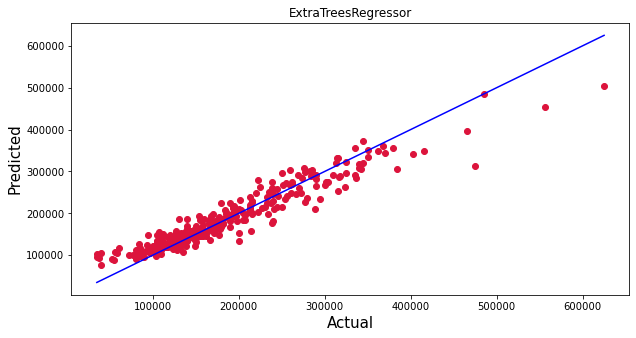

In [156]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values

In [157]:
#Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

array([344024.92, 213542.02, 267463.78, 168121.76, 235878.81, 103155.34,
       154612.28, 339025.76, 233532.47, 184067.75, 100971.34, 146002.6 ,
       121582.36, 199513.59, 291170.3 , 137992.96, 124472.63, 132598.11,
       174522.82, 196637.65, 145768.08, 156934.6 , 158820.53, 110365.61,
       123309.95, 132256.72, 183103.32, 156832.74, 180341.  , 117906.5 ,
       136222.53, 204173.19, 242383.11, 166670.  , 122392.1 , 186398.47,
       195454.61, 120012.  , 170105.37, 153626.  , 112036.24, 318291.68,
       208732.65, 205772.76, 149721.69, 130493.  , 132264.39, 111968.09,
       214510.38, 382515.12, 141718.02, 208267.55, 109982.87, 107971.37,
       266049.83, 140986.37, 144055.69, 193746.36, 134954.22, 264464.67,
       117936.99, 199052.9 , 143836.37, 154163.3 , 210494.01, 119896.08,
       151738.99, 212811.27, 146375.84, 155429.64, 278473.52, 168755.75,
       170409.14, 135392.03, 153130.  , 225300.48, 305495.33, 201261.31,
       307189.22, 148029.83, 227439.23, 141587.5 , 

In [158]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  344024.92
1  213542.02
2  267463.78
3  168121.76
4  235878.81
5  103155.34
6  154612.28
7  339025.76
8  233532.47
9  184067.75

In [159]:
#Lets save the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

I have saved the predicted values as csv file.